## VSSL (1) vs NSL (0)

### Import Libraries

In [1]:
from util_comp import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap
import time
import warnings

import xgboost


from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression

# Makes sure we see all columns
pd.set_option('display.max_columns', None)

# ignore warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
df = pd.DataFrame(main(retained=True))
print(df.shape)
df.head()

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 12 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute clean data: 0 minutes and 0 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 4 seconds
Elapsed time to compute change values in catagorical columns: 1 minutes and 56 seconds
Elapsed time to compute Full process: 2 minutes and 12 seconds
(44535, 100)


YEAR MMS Q1- Your sex? Q2- How old are you?          STATUS  \
0         1       A woman                  NaN         Workers   
1         1       A woman                  NaN       Employees   
2         1       A woman                  NaN       Employees   
3         1       A woman                  NaN       Employees   
4         1       A woman                  NaN  AM Technicians   

  In which sector of activity do you work?  \
0                                 Industry   
1  Wholesale trade (all businesses in 206)   
2  Wholesale trade (all businesses in 206)   
3  Wholesale trade (all businesses in 206)   
4  Wholesale trade (all businesses in 206)   

  What is the size of your business (in total, all locations combined)? 2009 fake  \
0                                50 to 249 employees                                
1                                50 to 249 employees                                
2                                50 to 249 employees                                
3                               250 to 999 employees                                
4                                50 to 249 employees                                

   Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                0.0                                                                   
1                                                0.0                                                                   
2                                                2.0                                                                   
3                                                0.0                                                                   
4                                                0.0                                                                   

   Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                0.0                                                                    
1                                                0.0                                                                    
2                                                0.0                                                                    
3                                                0.0                                                                    
4                                                0.0                                                                    

   Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                0.0                                                                     
1                                                0.0                                                                     
2                                                0.0                                                                     
3                                                0.0                                                                     
4                                                2.0                                                                     

   Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?  \
0                                                0.0                                                                    
1                                                0.0                                                                    
2                                                0.0                                                                    
3                                                0.0                                                                    
4                               

In [3]:
df.describe()

YEAR MMS  \
count  44535.000000   
mean       5.725250   
std        2.753581   
min        1.000000   
25%        3.000000   
50%        6.000000   
75%        8.000000   
max       10.000000   

       Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       42873.000000                                                                   
mean                                            0.204604                                                                   
std                                             0.495812                                                                   
min                                             0.000000                                                                   
25%                                             0.000000                                                                   
50%                                             0.000000                                                                   
75%                                             0.000000                                                                   
max                                             9.000000                                                                   

       Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       42872.000000                                                                    
mean                                            0.272229                                                                    
std                                             0.599071                                                                    
min                                             0.000000                                                                    
25%                                             0.000000                                                                    
50%                                             0.000000                                                                    
75%                                             0.000000                                                                    
max                                             9.000000                                                                    

       Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       42873.000000                                                                     
mean                                            0.216033                                                                     
std                                             0.522517                                                                     
min                                             0.000000                                                                     
25%                                             0.000000                                                                     
50%                                             0.000000                                                                     
75%                                             0.000000                                                                     
max                                             9.000000                                                                     

       Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?  \
count                                       42873.000000                                                                    
mean                                            0.228629                                                                    
std                                             0.

In [4]:
# drop rows where 'YEAR MMS' is 1 or 10
df = df[df['YEAR MMS'] != 1]
df = df[df['YEAR MMS'] != 10]

In [5]:
df.shape

(37681, 100)

In [6]:
# drop column YEAR MMS
df = df.drop(columns=['YEAR MMS'])

In [7]:
# one hot encode

df = pd.get_dummies(df)
df.head()

Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
2302                                                1.0                                                                   
2303                                                0.0                                                                   
2304                                                0.0                                                                   
2305                                                0.0                                                                   
2306                                                0.0                                                                   

      Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
2302                                                2.0                                                                    
2303                                                0.0                                                                    
2304                                                0.0                                                                    
2305                                                0.0                                                                    
2306                                                0.0                                                                    

      Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
2302                                                0.0                                                                     
2303                                                0.0                                                                     
2304                                                1.0                                                                     
2305                                                0.0                                                                     
2306                                                0.0                                                                     

      Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?  \
2302                                                0.0                                                                    
2303                                                0.0                                                                    
2304                                                1.0                                                                    
2305                                                0.0                                                                    
2306                                                0.0                                                                    

      outcome  Q1- Your sex?_A man  Q1- Your sex?_A woman  \
2302        2                    1                      0   
2303        1                    1                      0   
2304        3                    0                      1   
2305        0                    1                      0   
2306        2                    1                      0   

      Q2- How old are you?_18 - 30  Q2- How old are you?_30 - 39  \
2302                             0                             1   
2303                             1                             0   
2304                             0                             0   
2305                             0                             1   
2306                             0                             0   

      Q2- How old are you?_40 - 44  Q2- How old are you?_45 - 49  \
2302                             0                             0   
2303                             0                             0   
2304                             0            

#### split data to train and test sets

In [8]:
data = df

# Split the data for training and evaluation
# X: features with the outcome column removed, where outcome is 0 or 1
# y: outcome column

# get the rows withs outcome 0 or 1
X = data[(data['outcome'] == 0) | (data['outcome'] == 1)].drop('outcome', axis=1, inplace=False)
X.columns = [str(i) for i in X.columns]
y = data[(data['outcome'] == 0) | (data['outcome'] == 1)]['outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


#### Train the Random Forest model

In [9]:
# Fit RF (blackbox) model
t1 = time.time()
sl = RandomForestClassifier(class_weight='balanced')
sl.fit(X_train, y_train)
t2 = time.time()
print(time_e(t1, t2, "fitting RF model"))

Elapsed time to compute fitting RF model: 0 minutes and 4 seconds


In [10]:
y_pred = sl.predict(X_test)
y_pred_proba = sl.predict_proba(X_test)

In [11]:
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy of test: {accuracy_score(y_test, y_pred)}")
print(f"Accuracy of train: {accuracy_score(y_train, sl.predict(X_train))}")

# ROAUC

print(f"ROAUC: {roc_auc_score(y_test, y_pred_proba[:,1])}")
print(f"Confusin matrix: \n{confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

F1 Score: 0.46925107486090034
Accuracy of test: 0.8376216968011126
Accuracy of train: 0.9999565330783274
ROAUC: 0.6892329638325062
Confusin matrix: 
[[4805    2]
 [ 932   13]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4807
           1       0.87      0.01      0.03       945

    accuracy                           0.84      5752
   macro avg       0.85      0.51      0.47      5752
weighted avg       0.84      0.84      0.77      5752



## Explanantion using SHAP

In [12]:
explainer = shap.TreeExplainer(sl)

# Calculate shapley values for test data
start_index = 0
end_index = 10

# time to run 10 samples
s_time = time.time()
shap_values = explainer.shap_values(X_test[start_index:end_index]) # 0 - 9
e_time = time.time()
time_e(s_time, e_time, f"Shapley values for test data[{start_index}:{end_index}]")
X_test[start_index:end_index]

Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
25520                                                1.0                                                                   
37274                                                1.0                                                                   
13509                                                0.0                                                                   
16579                                                0.0                                                                   
37427                                                0.0                                                                   
30197                                                0.0                                                                   
32103                                                0.0                                                                   
18725                                                1.0                                                                   
10812                                                1.0                                                                   
10658                                                0.0                                                                   

       Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
25520                                                0.0                                                                    
37274                                                1.0                                                                    
13509                                                0.0                                                                    
16579                                                0.0                                                                    
37427                                                2.0                                                                    
30197                                                0.0                                                                    
32103                                                0.0                                                                    
18725                                                0.0                                                                    
10812                                                0.0                                                                    
10658                                                0.0                                                                    

       Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
25520                                                1.0                                                                     
37274                                                0.0                                                                     
13509                                                0.0                                                                     
16579                                                0.0                                                                     
37427                                                2.0                                                                     
30197                                                0.0                                                                     
32103                                                0.0                                                                     
18725                                                0.0                                                                     
10812                                                0.0                                                                     
10658 

In [13]:
y_test[start_index:end_index]

25520    0
37274    0
13509    1
16579    0
37427    0
30197    0
32103    0
18725    1
10812    1
10658    1
Name: outcome, dtype: int64

### SHAP Values

In [14]:
print(shap_values[0].shape)
shap_values

(333, 2)


array([[[-6.79811601e-03,  6.79811601e-03],
        [ 1.00284780e-03, -1.00284780e-03],
        [ 1.40719861e-02, -1.40719861e-02],
        ...,
        [ 2.86162947e-03, -2.86162947e-03],
        [ 1.55266356e-04, -1.55266356e-04],
        [-3.87276429e-04,  3.87276429e-04]],

       [[-7.45520831e-03,  7.45520831e-03],
        [ 4.53371629e-03, -4.53371629e-03],
        [-1.31954633e-03,  1.31954633e-03],
        ...,
        [ 2.27469408e-03, -2.27469408e-03],
        [ 1.87131256e-04, -1.87131256e-04],
        [-3.80331809e-04,  3.80331810e-04]],

       [[ 2.06518427e-03, -2.06518427e-03],
        [ 9.00673216e-04, -9.00673217e-04],
        [-1.91997302e-04,  1.91997303e-04],
        ...,
        [-4.27627603e-03,  4.27627603e-03],
        [ 2.84450527e-04, -2.84450528e-04],
        [-3.55625659e-04,  3.55625659e-04]],

       ...,

       [[ 8.60643699e-04, -8.60643699e-04],
        [ 6.43455778e-04, -6.43455778e-04],
        [-2.30078903e-03,  2.30078903e-03],
        ...,
     

In [15]:
shap.initjs()
# Force plot
prediction = sl.predict(X_test[start_index:end_index])[0]
print(f"The sl predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[...,1],
                X_test[start_index:end_index])  # for values

The sl predicted: 0


### Summary of Variables that affected the prediction using SHAP

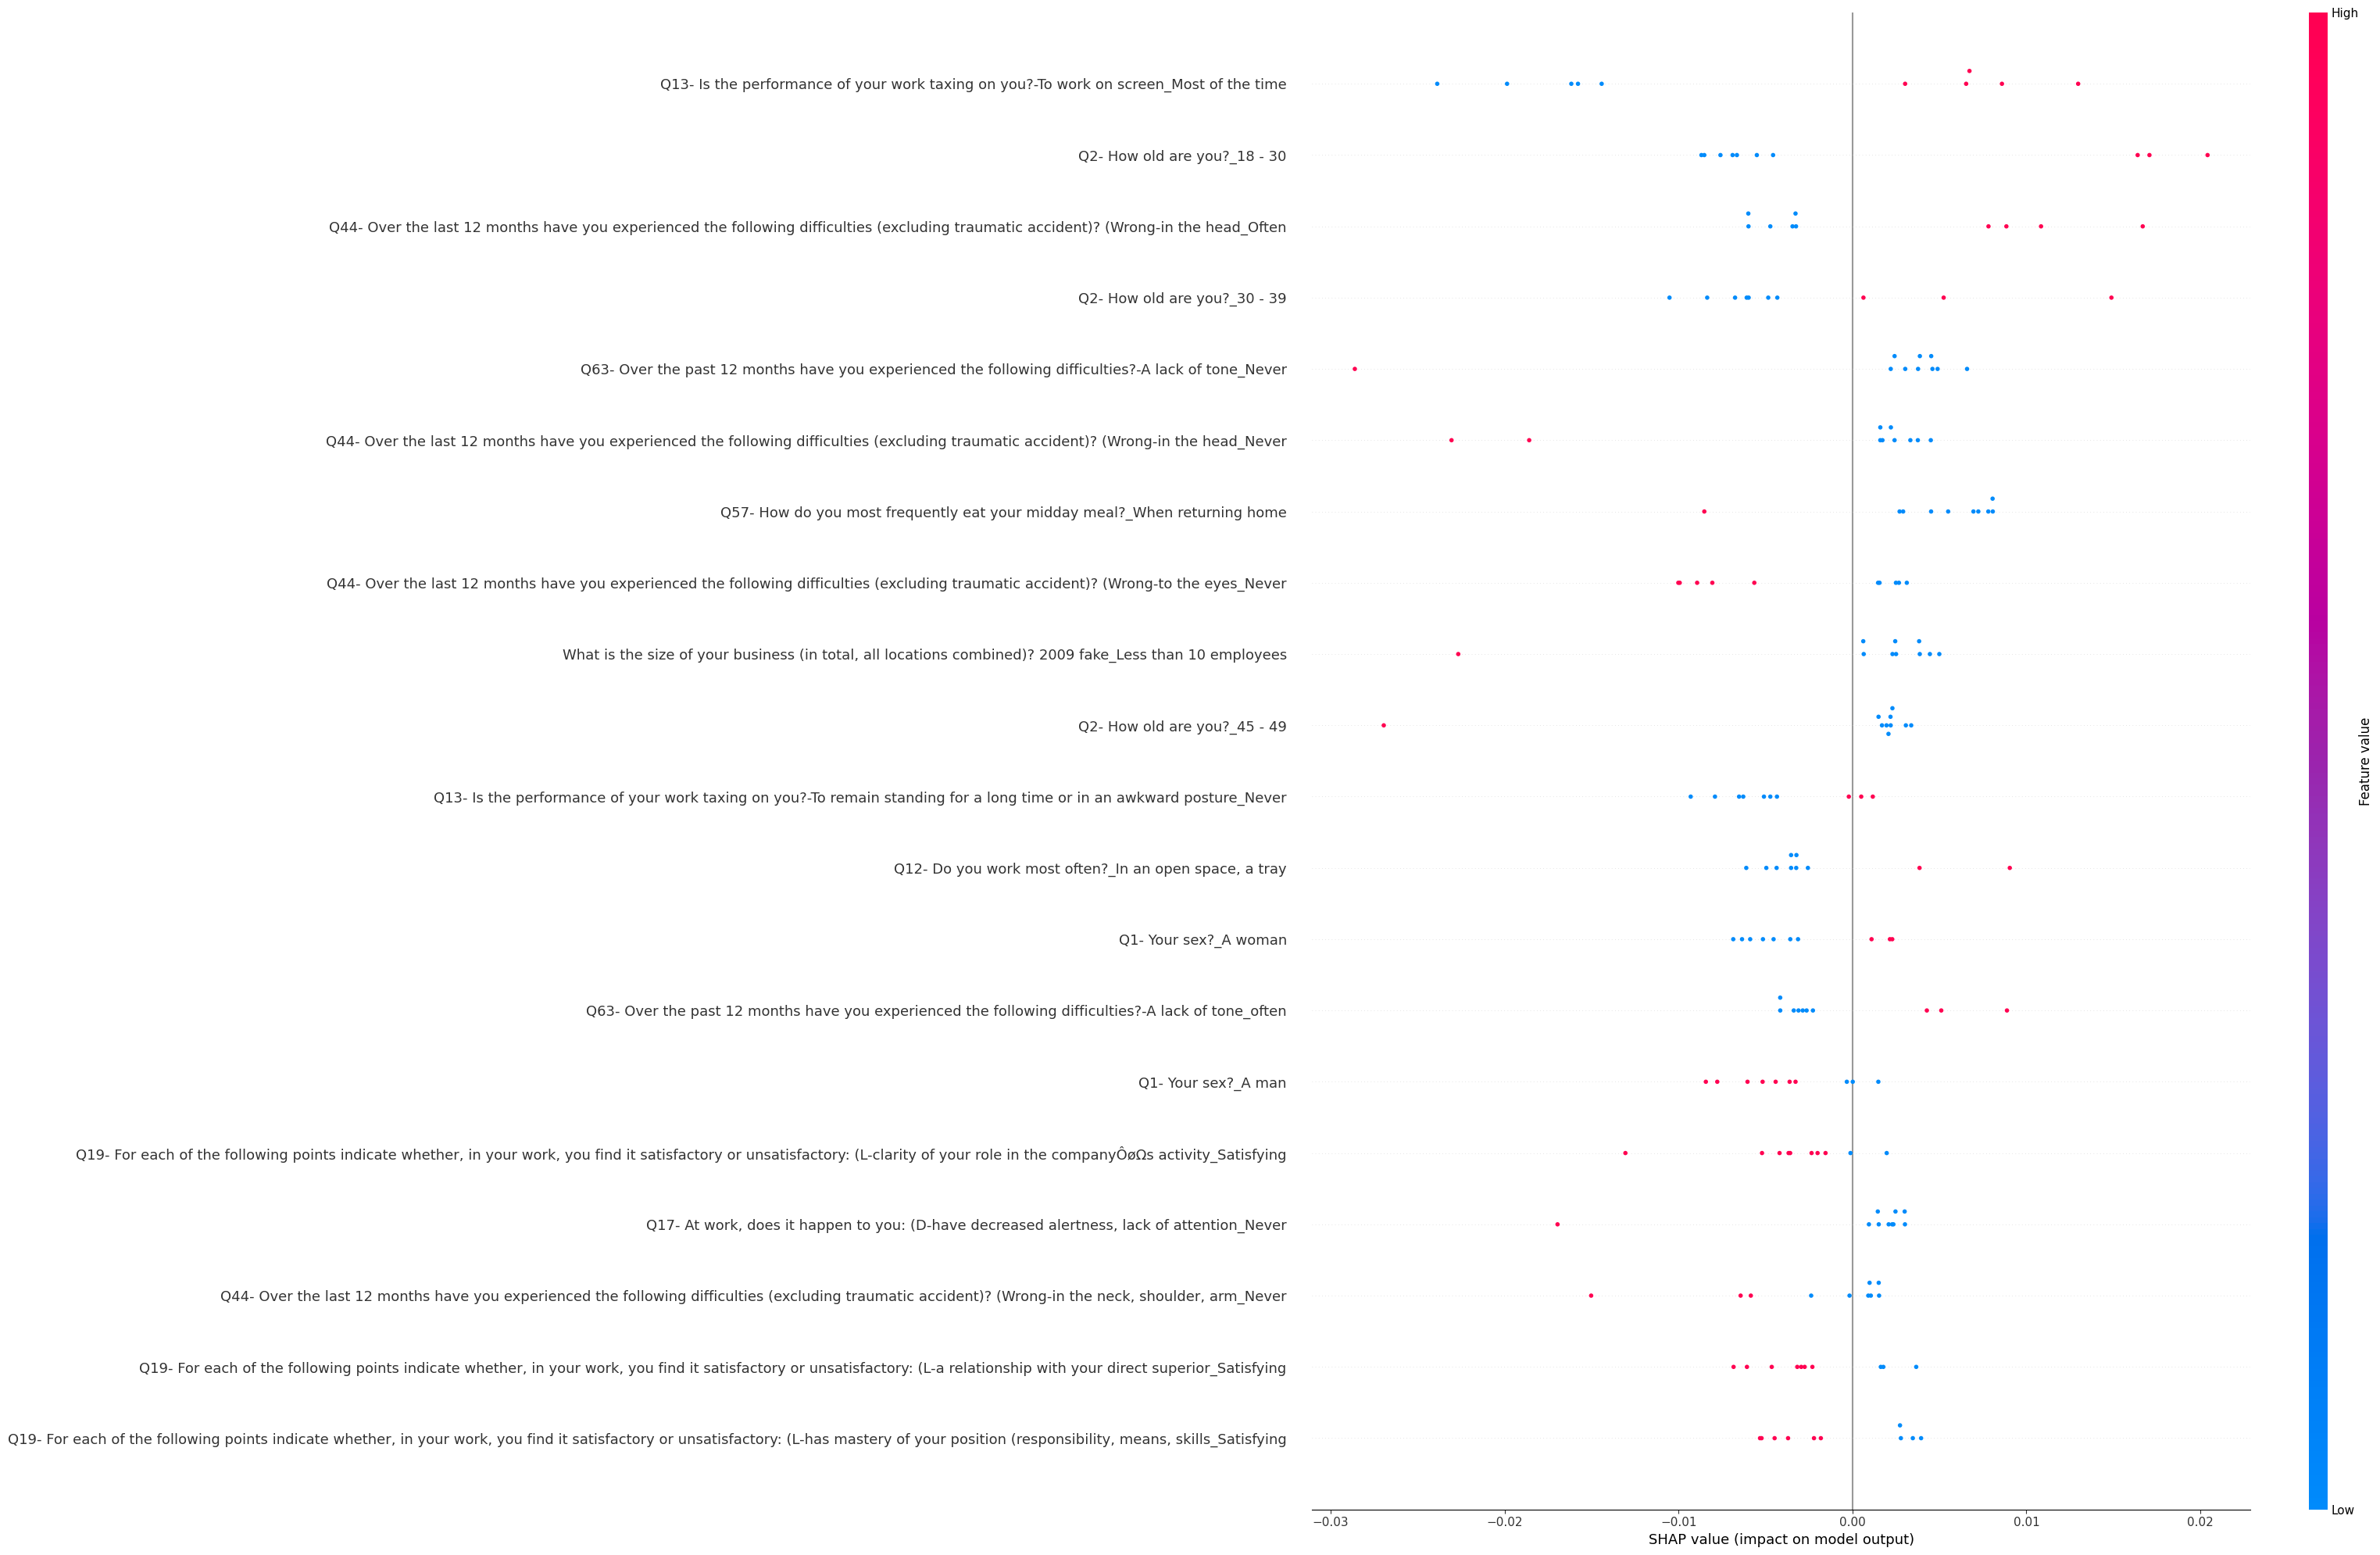

In [16]:
shap.summary_plot(shap_values[...,1], X_test[start_index:end_index], plot_size=(32,20), show=False)
plt.savefig('outputs/02_01_shap/summary_plot_for_10_samples.png')
plt.show()

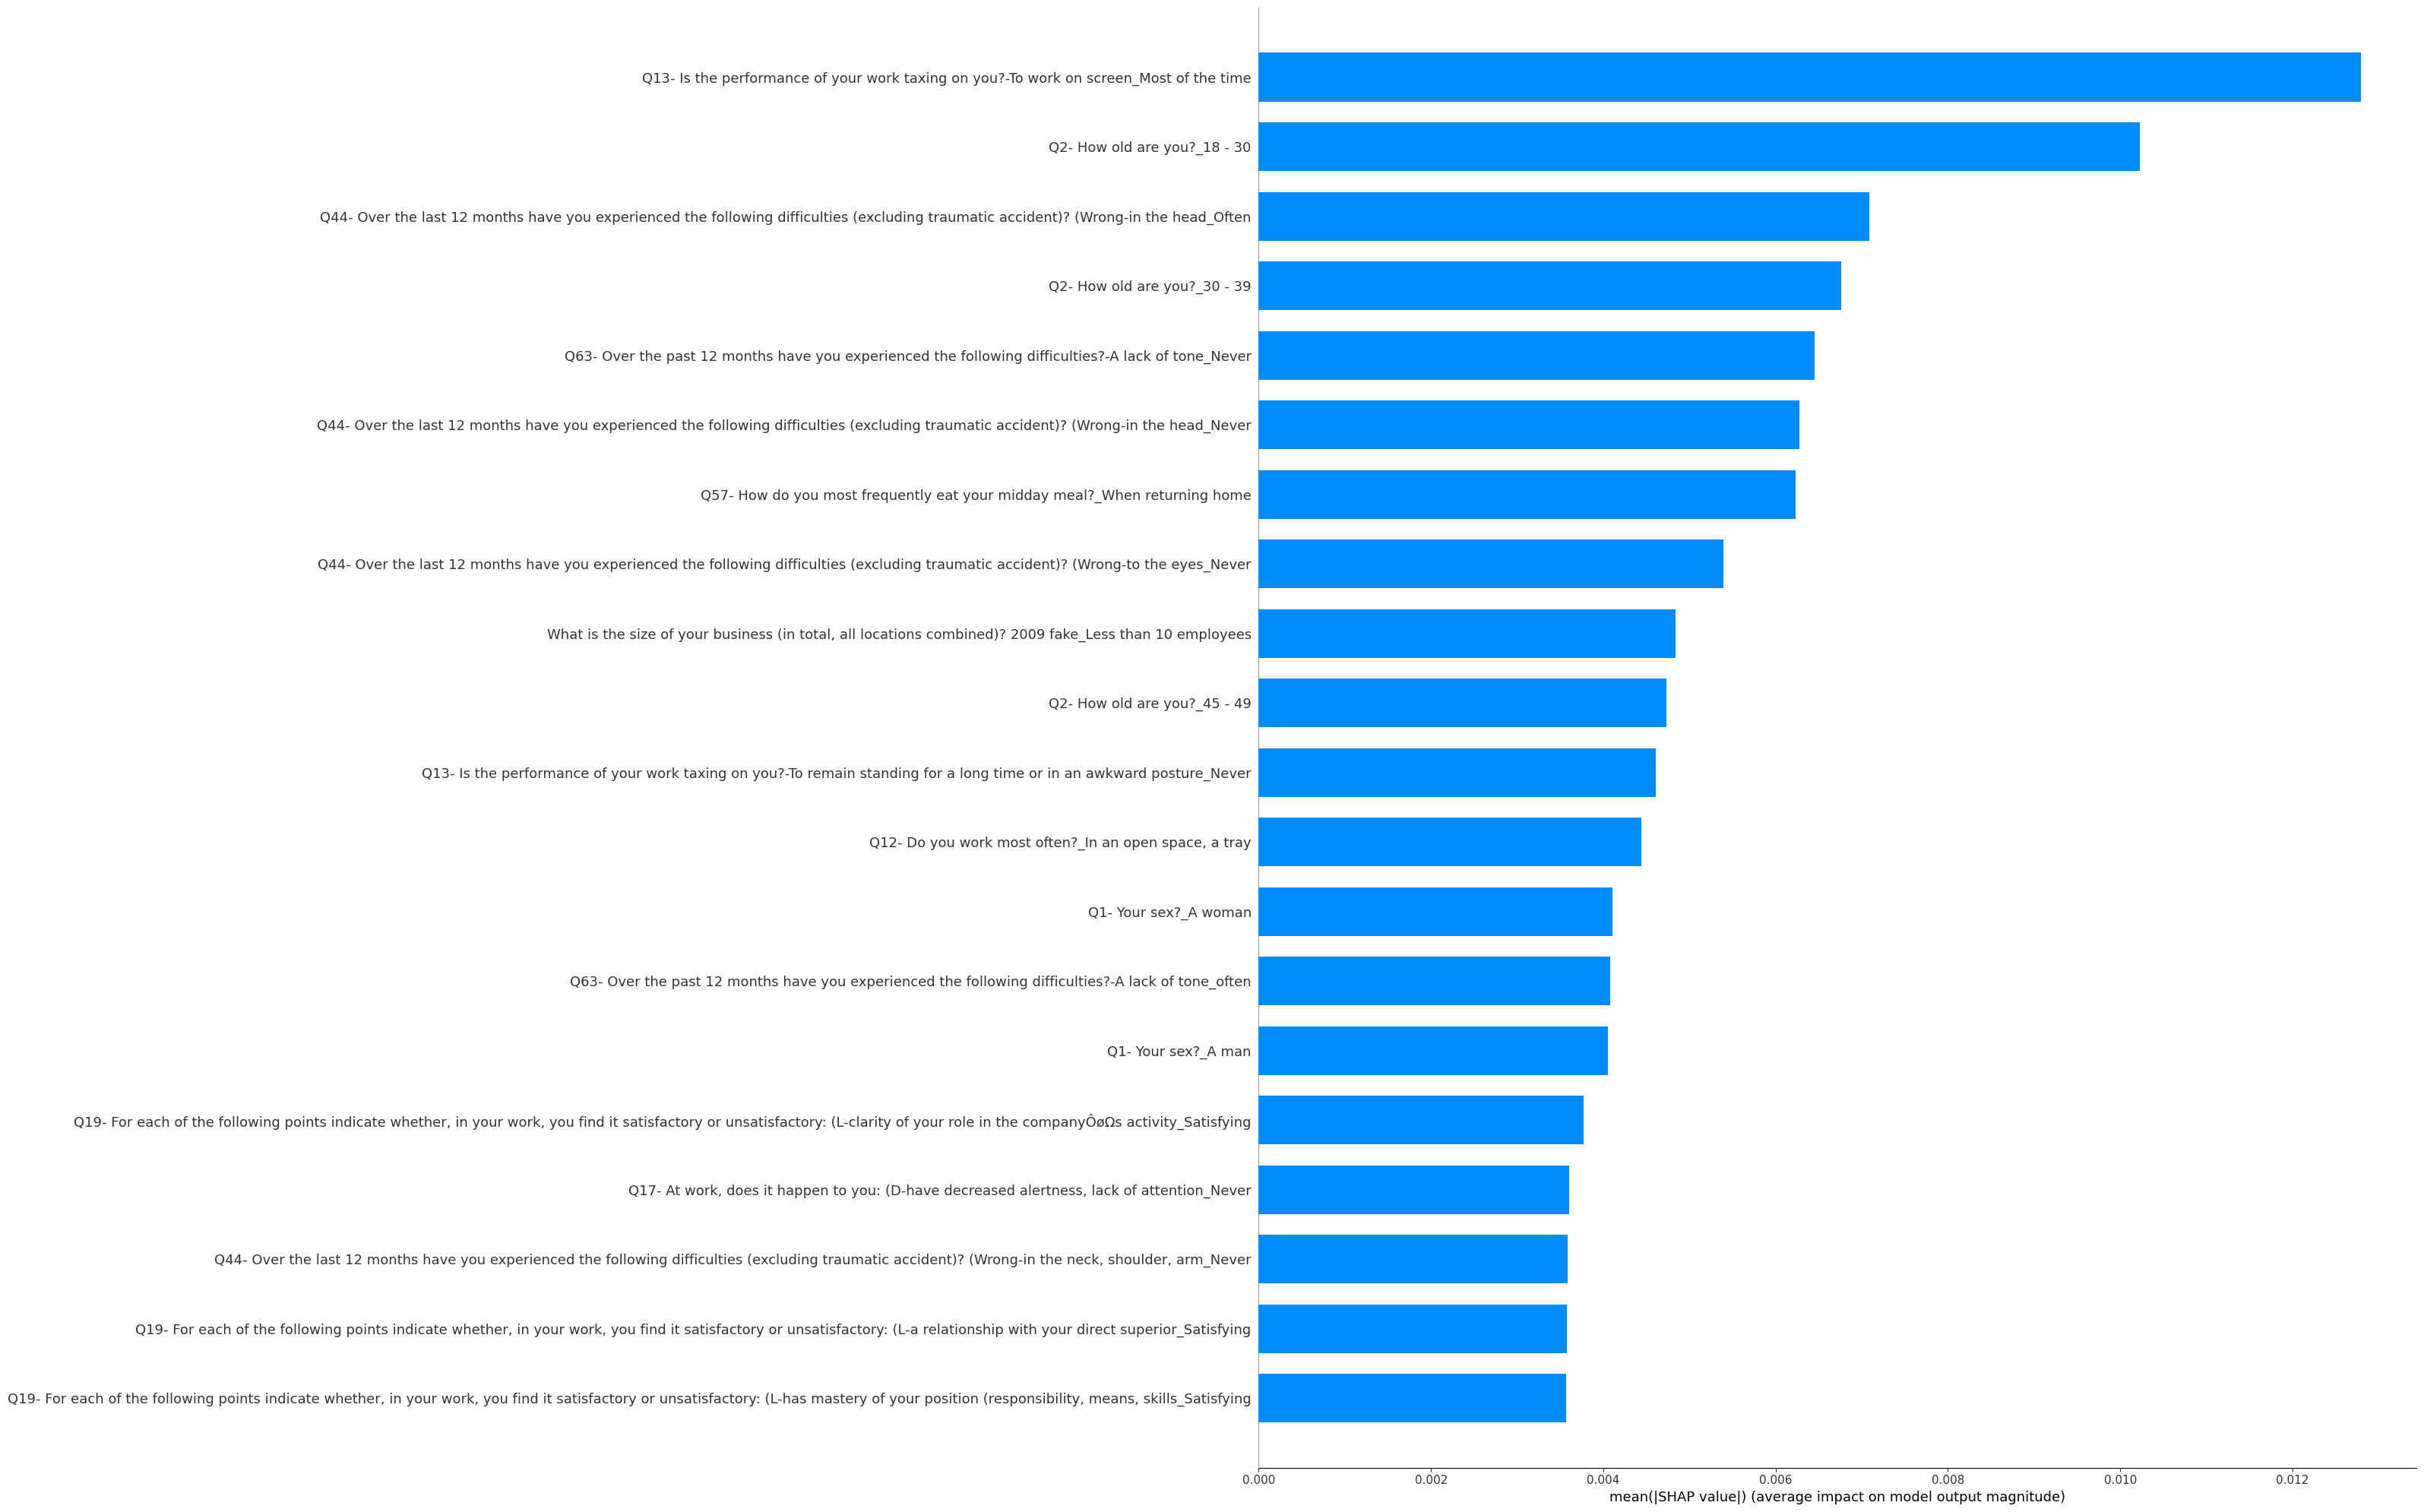

In [17]:
shap.summary_plot(shap_values[...,1], X_test[start_index:end_index], plot_type="bar", plot_size=(32,20), show=False)
plt.savefig('outputs/02_01_shap/summary_plot_bar_for_10_samples.png')
plt.show()

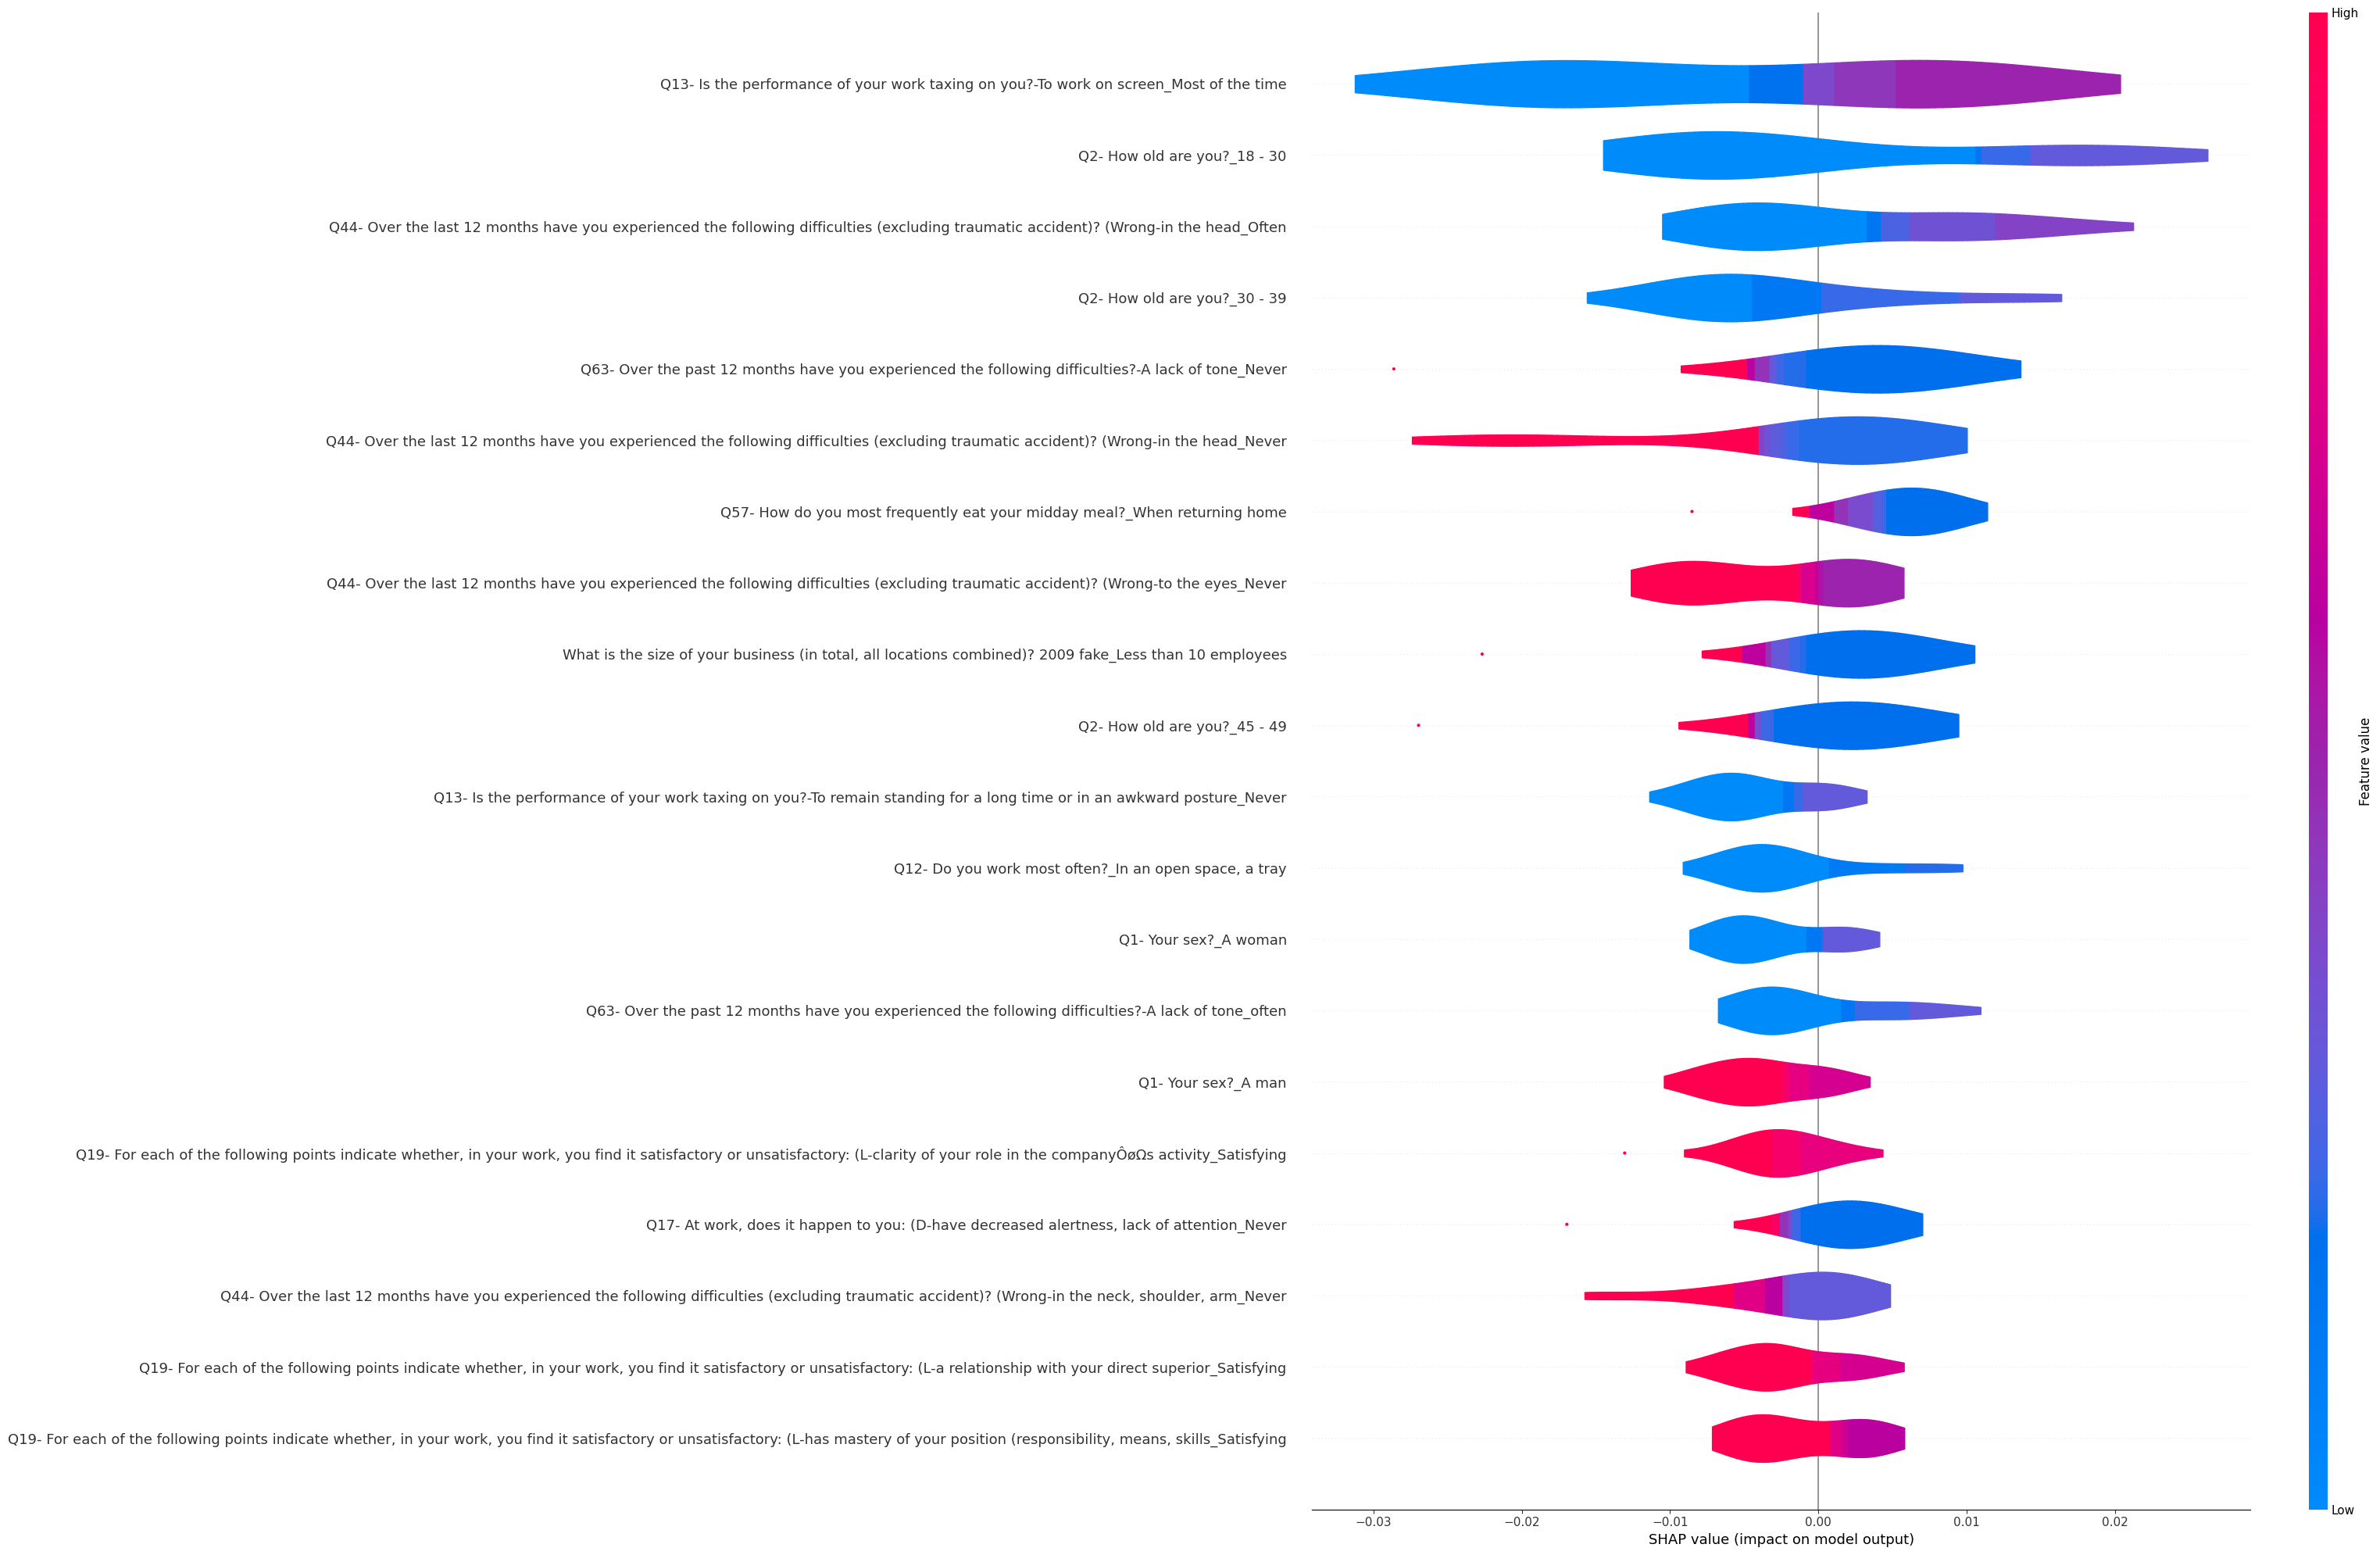

In [18]:
shap.summary_plot(shap_values[...,1], X_test[start_index:end_index], plot_type="violin", plot_size=(32,20), show=False)
plt.savefig('outputs/02_01_shap/summary_plot_violin_for_10_samples.png')
plt.show()

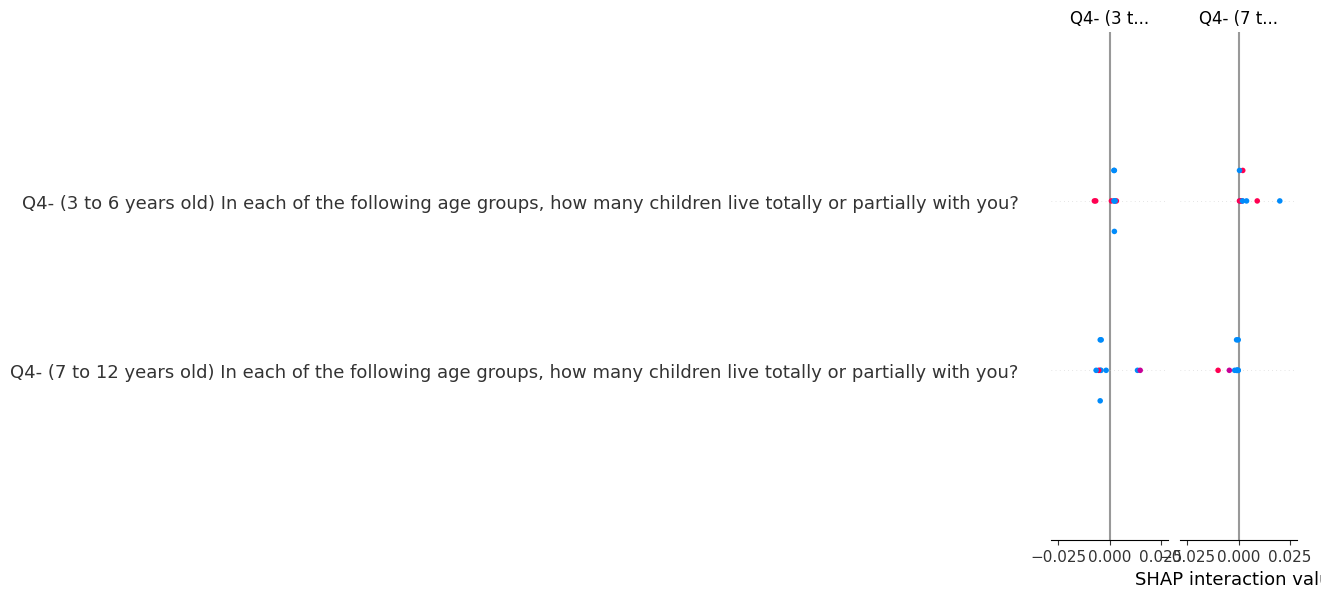

In [19]:
# Shap interaction values

shap.summary_plot(shap_values, X_test[start_index:end_index], plot_type="bar", plot_size=(18,12), show=False)
plt.savefig('outputs/02_01_shap/summary_plot_bar_interaction_for_10_samples.png')
plt.show()

In [20]:
# Calculate shapley values for all data
s_time = time.time()
shap_values_all = explainer.shap_values(X_test)
e_time = time.time()
print(time_e(s_time, e_time, "Shapley values for all data"))

Elapsed time to compute Shapley values for all data: 29 minutes and 46 seconds


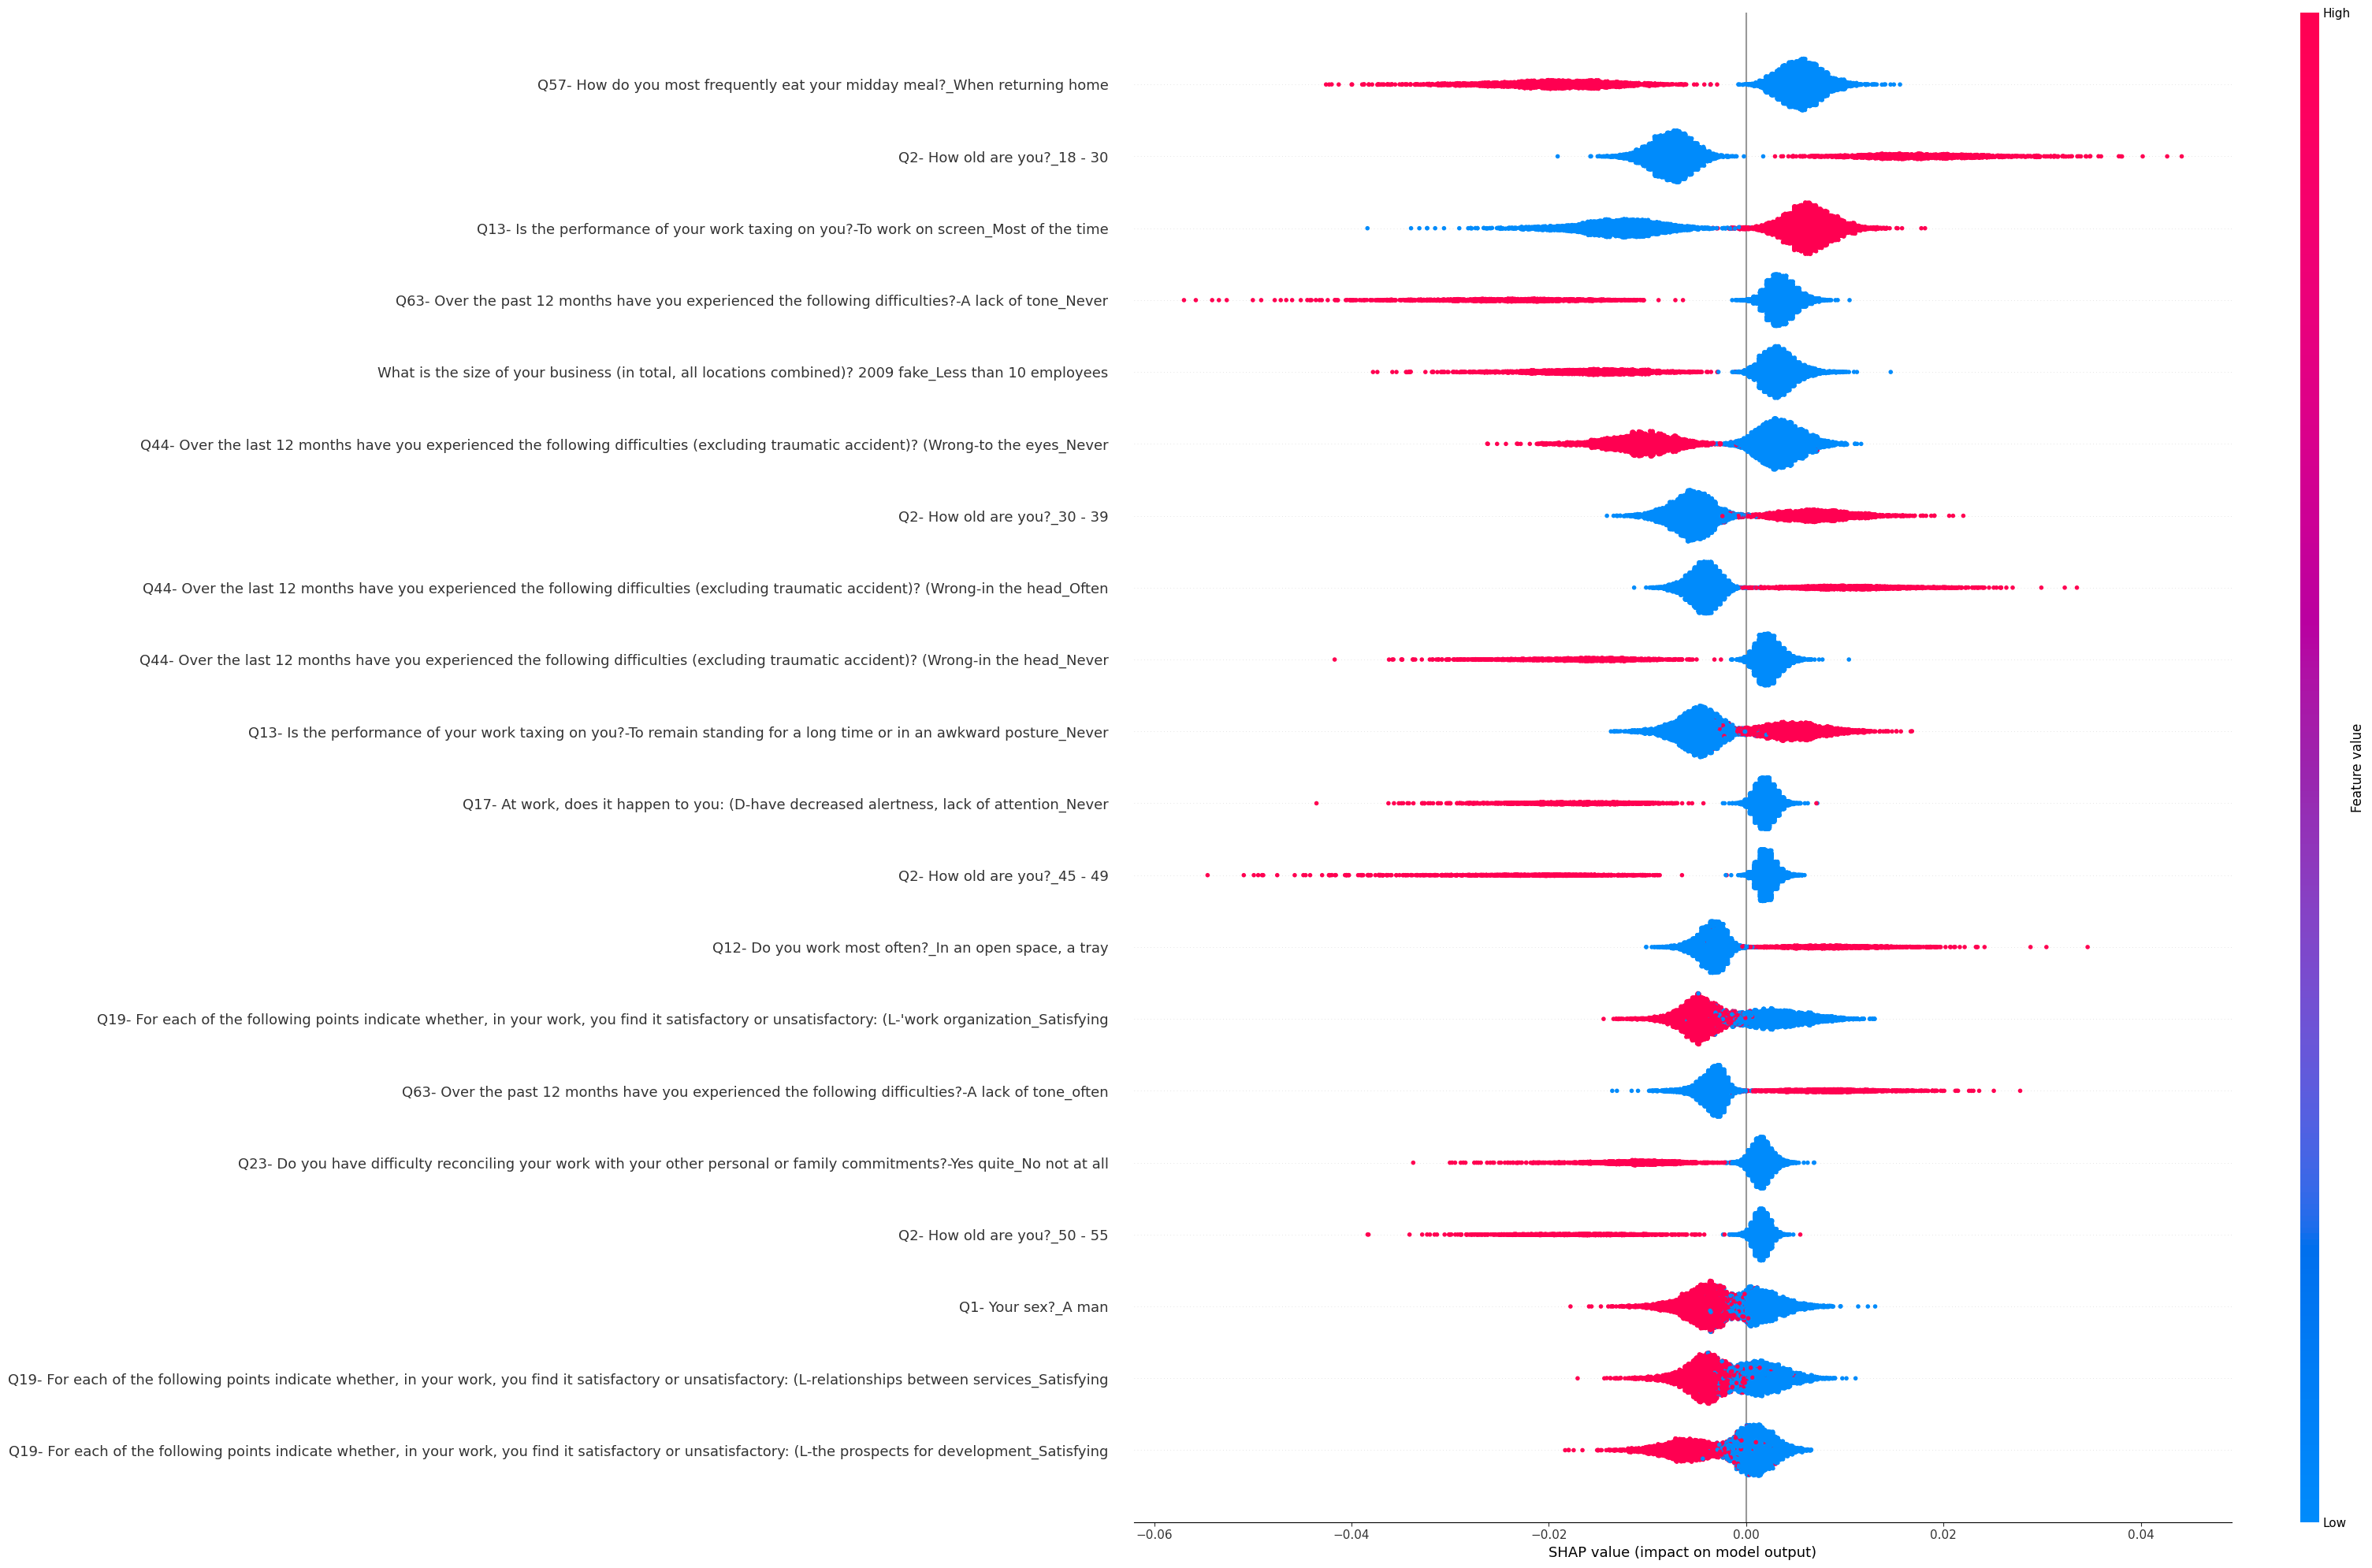

Elapsed time to compute Summary plot for all data: 0 minutes and 2 seconds


In [21]:
s_time = time.time()
shap.summary_plot(shap_values_all[...,1], X_test, plot_size=(32,20), show=False)
plt.savefig('outputs/02_01_shap/shap_summary_plot_all.png')
plt.show()
e_time = time.time()
print(time_e(s_time, e_time, "Summary plot for all data"))

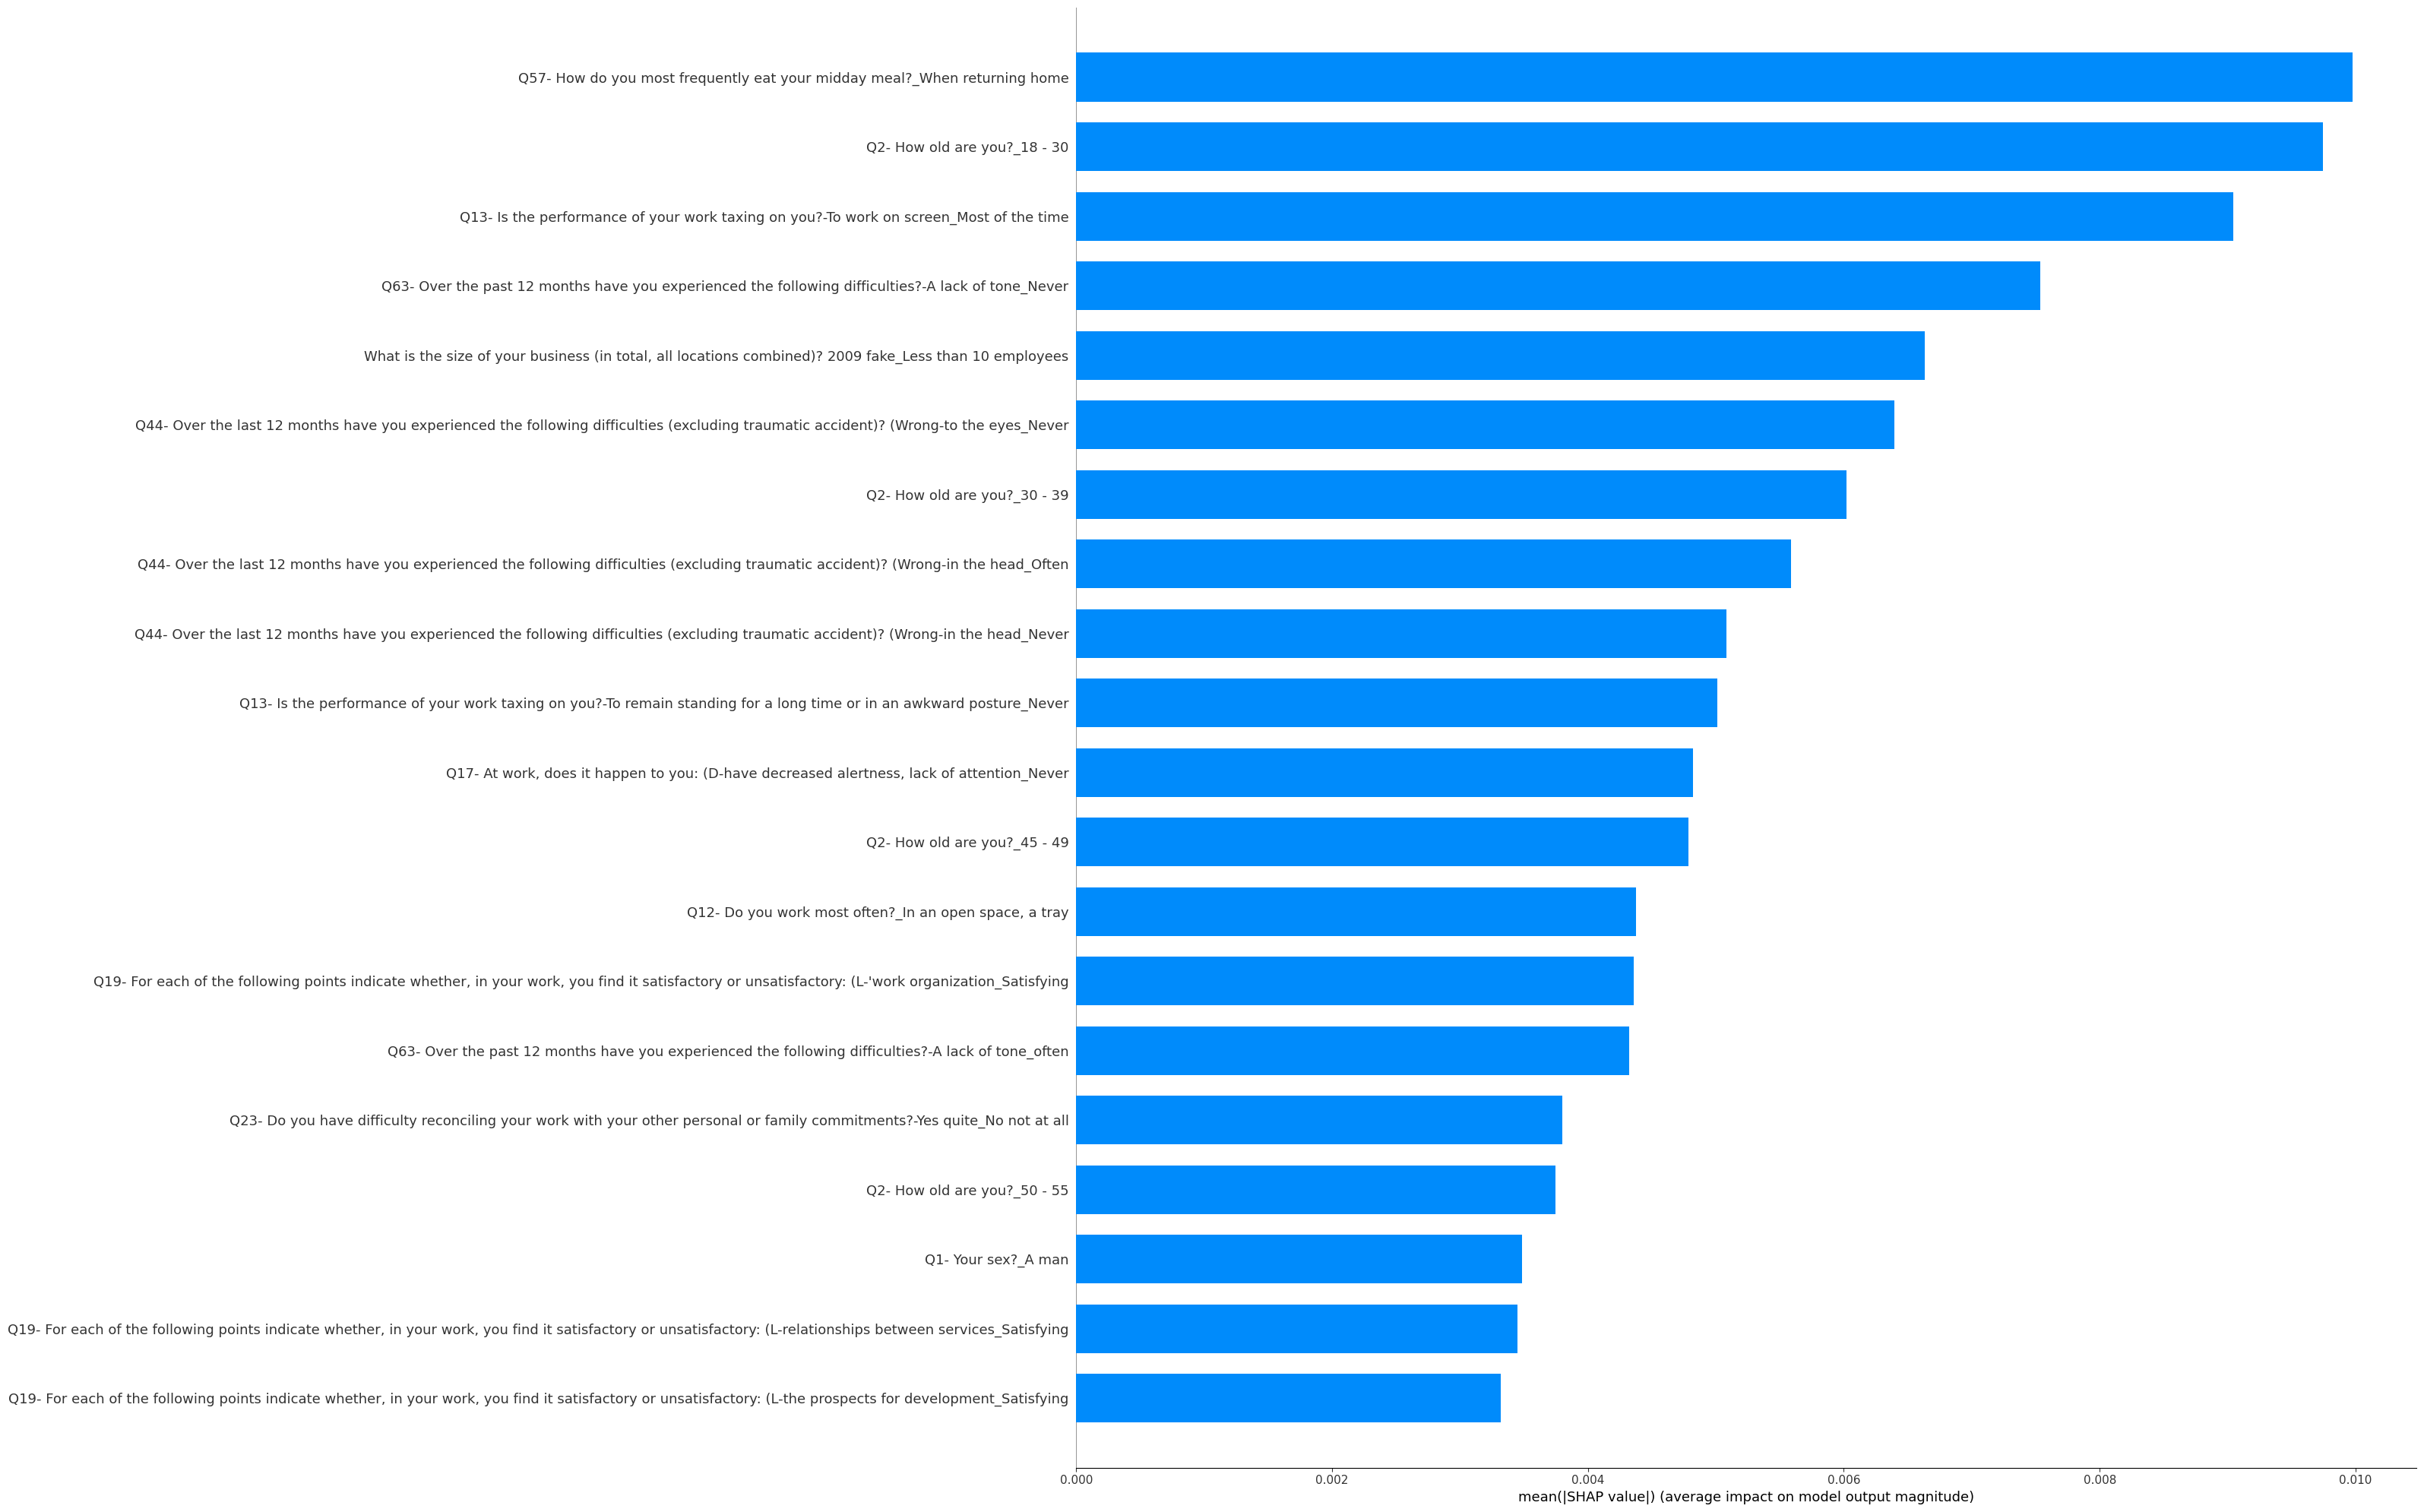

In [22]:
shap.summary_plot(shap_values_all[...,1], X_test, plot_type="bar", plot_size=(32,20), show=False)
plt.savefig('outputs/02_01_shap/shap_summary_plot_bar_all.png')
plt.show() 

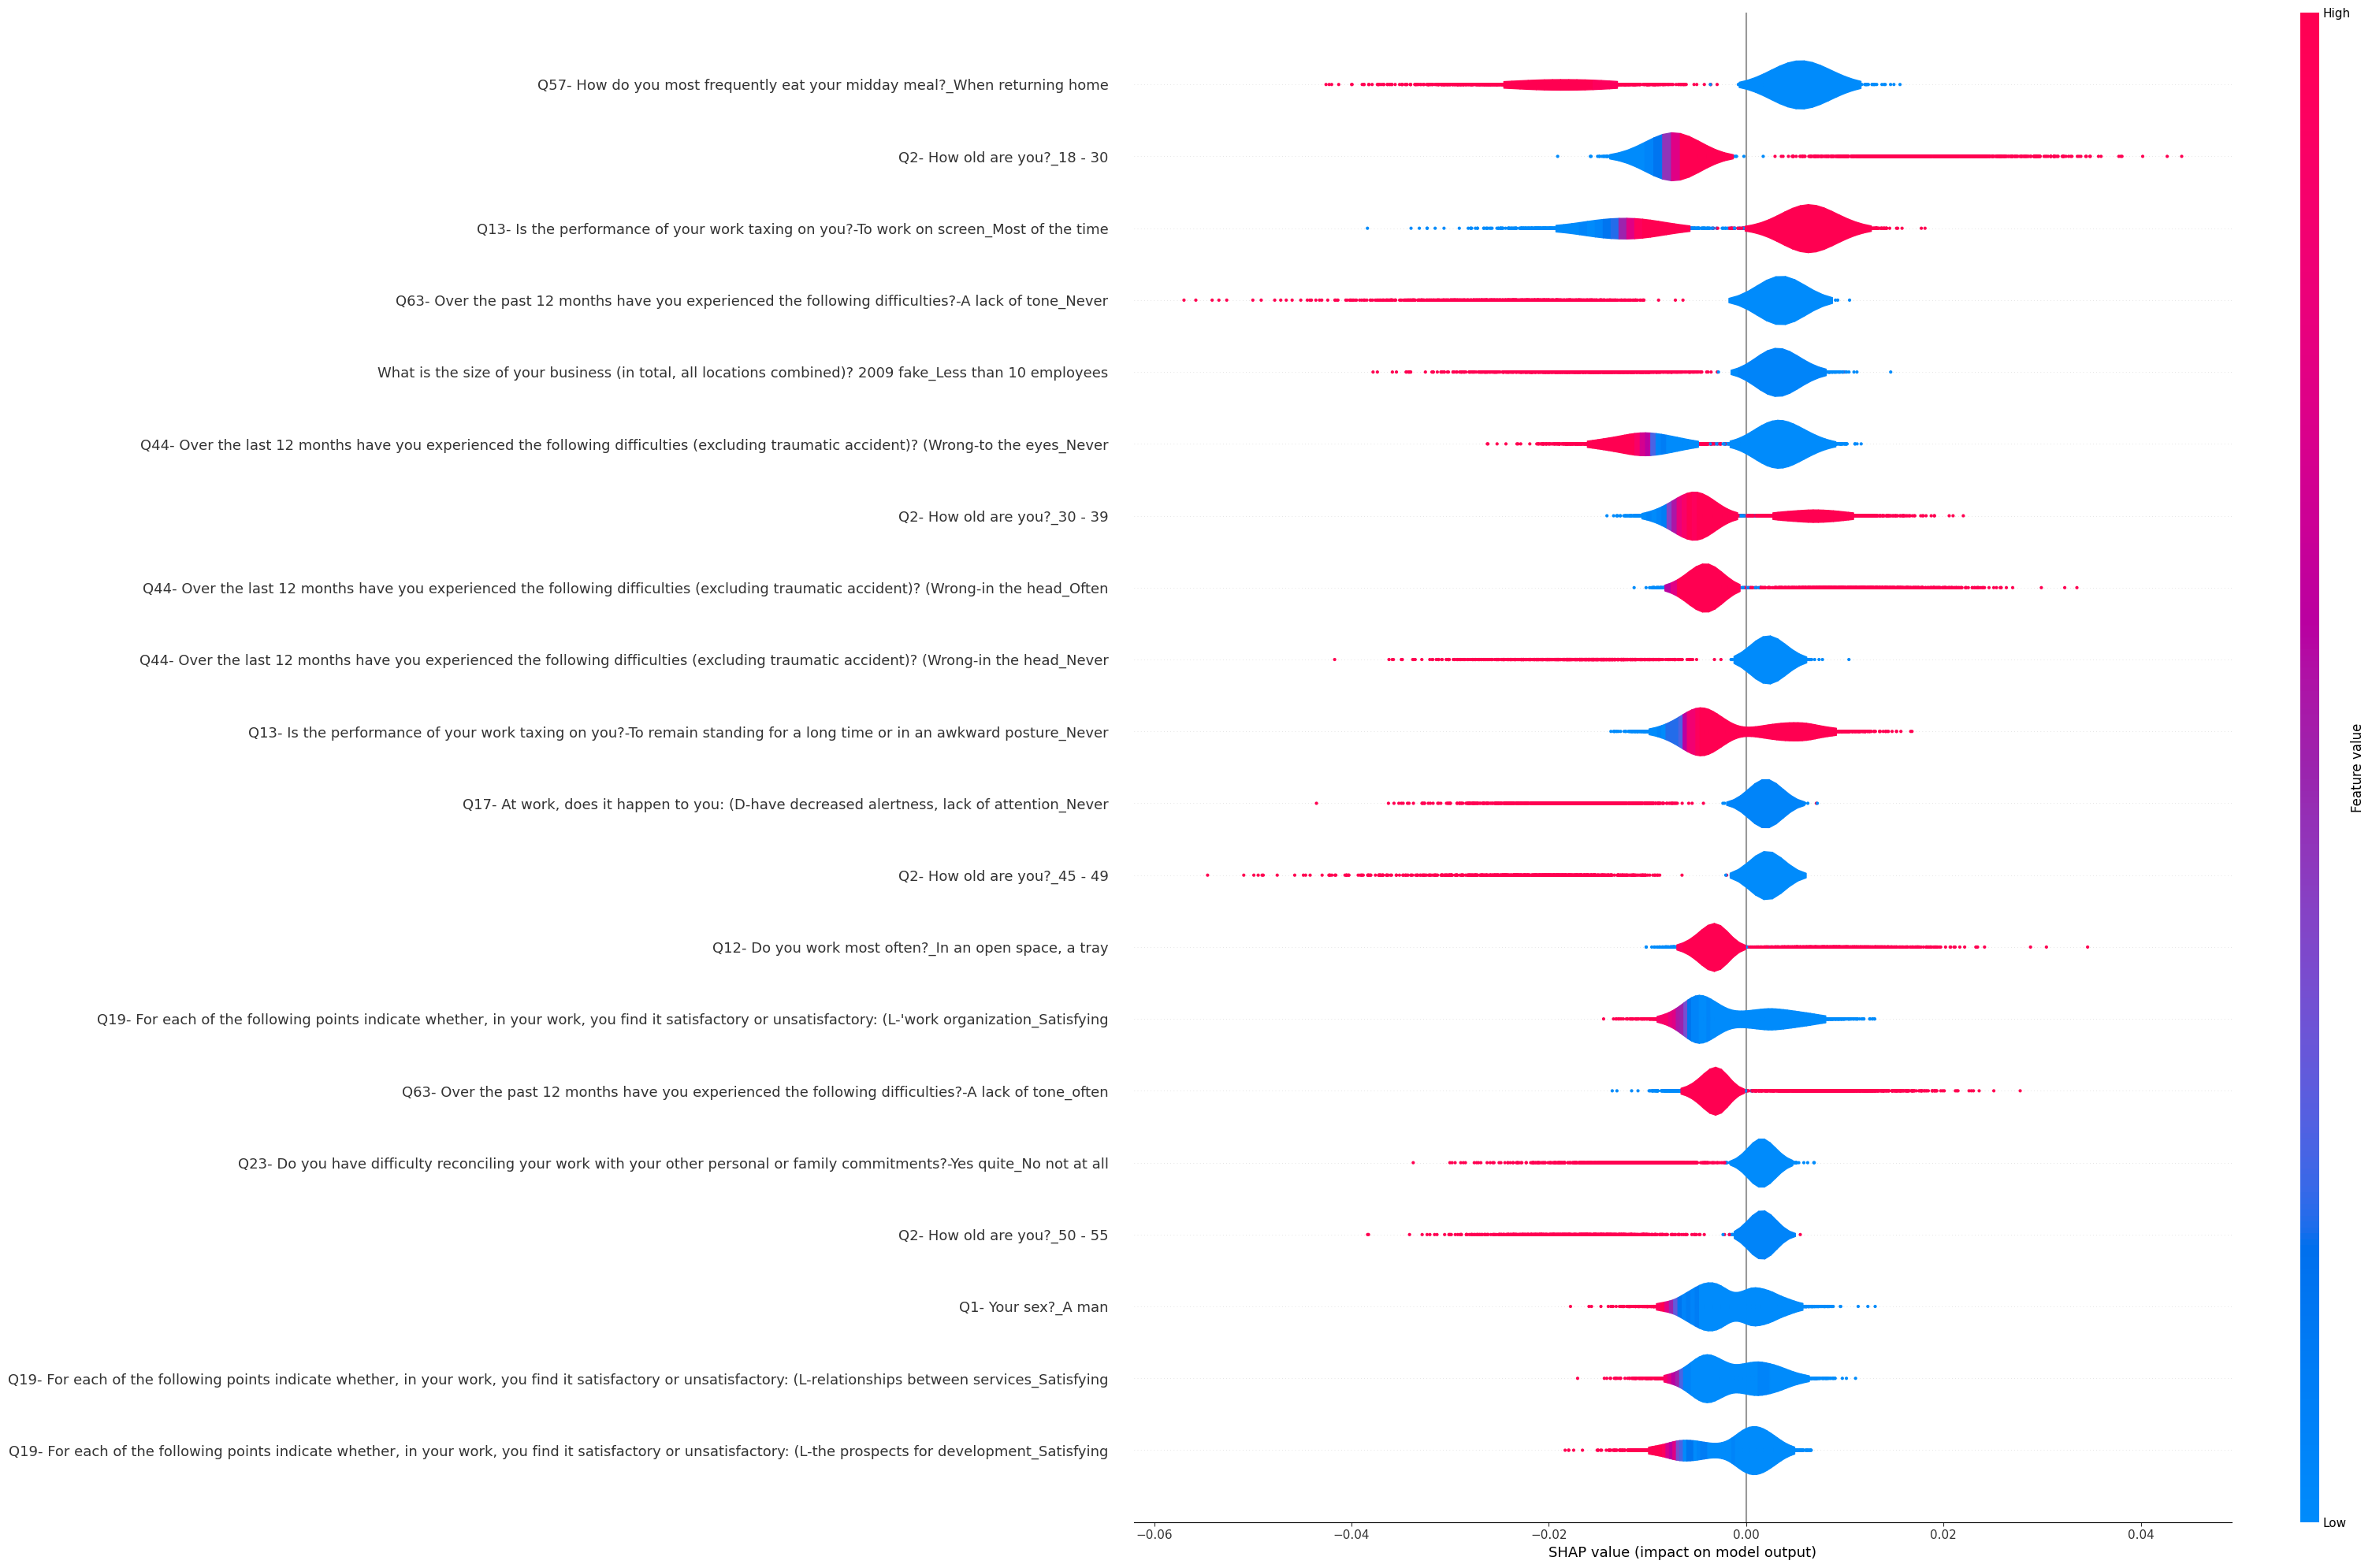

In [23]:
shap.summary_plot(shap_values_all[...,1], X_test, plot_type="violin", plot_size=(32,20), show=False)
plt.savefig('outputs/02_01_shap/shap_summary_plot_violin_all.png')
plt.show()

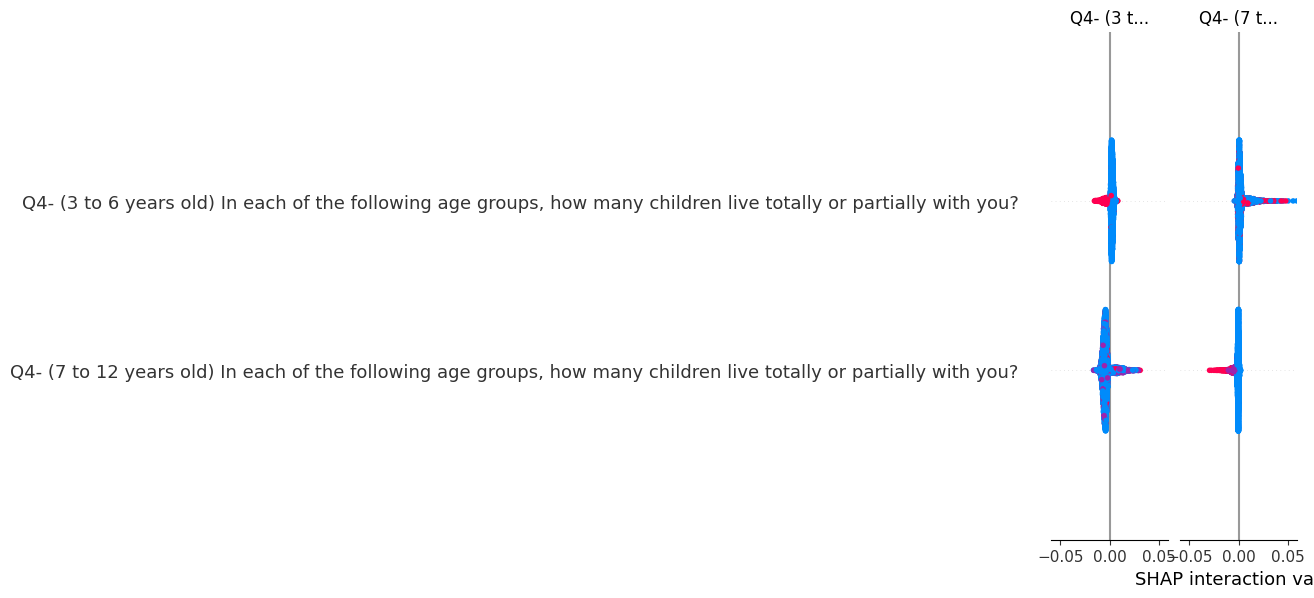

In [24]:
# get the most important feature

shap.summary_plot(shap_values_all, X_test, plot_type="bar", plot_size=(32,20), show=False)
plt.savefig('outputs/02_01_shap/shap_summary_plot_bar_interaction_all.png')
plt.show()

### XGBoost
max_depth = 3

In [25]:
# train a model with single tree
Xd = xgboost.DMatrix(X, label=y)
model = xgboost.train({"eta": 1, "max_depth": 3, "base_score": 0, "lambda": 0}, Xd, 1)

print("Model error =", np.linalg.norm(y - model.predict(Xd)))
print(model.get_dump(with_stats=True)[0])

Model error = 62.00354135246188
0:[Q13- Is the performance of your work taxing on you?-To work on screen_Most of the time<1] yes=1,no=2,missing=2,gain=27.6712646,cover=28758
	1:[Q2- How old are you?_18 - 30<1] yes=3,no=4,missing=4,gain=10.4526672,cover=11642
		3:[Q2- How old are you?_30 - 39<1] yes=7,no=8,missing=8,gain=10.1537247,cover=9410
			7:leaf=0.0885758996,cover=6390
			8:leaf=0.158940405,cover=3020
		4:[Q42-During the last 12 months have you had a work accident?_Yes<1] yes=9,no=10,missing=10,gain=3.61497498,cover=2232
			9:leaf=0.17764093,cover=2111
			10:leaf=0.355371892,cover=121
	2:[Q63- Over the past 12 months have you experienced the following difficulties?-A lack of tone_Never<1] yes=5,no=6,missing=6,gain=21.0826416,cover=17116
		5:[Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-relationships between services_Satisfying<1] yes=11,no=12,missing=12,gain=11.1330566,cover=14144
			11:leaf=0.233980447,cover

In [26]:
# Calculate model accuracy and F1 score

y_pred = model.predict(Xd) > 0.5
print(f"F1 Score {f1_score(y, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y, y_pred)}")

F1 Score 0.455526525048279
Accuracy 0.8366367619445024


In [27]:
pred = model.predict(Xd, output_margin=True)

explainer = shap.TreeExplainer(model)
explanation = explainer(Xd)
shap_values = explanation.values

# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()

2.9802322e-08

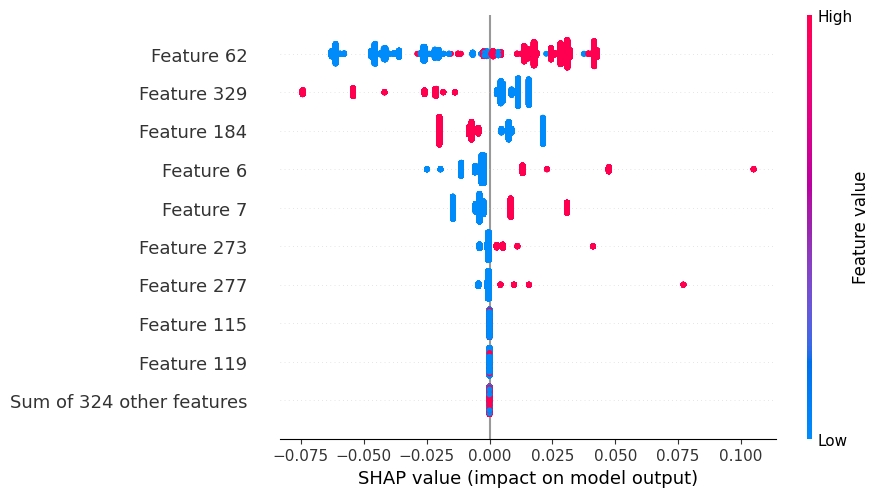

In [28]:
"""
To get an overview of which features are most important for a model we can plot the SHAP values of every feature for every sample.
The plot below sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution
of the impacts each feature has on the model output. The color represents the feature value (red high, blue low).
"""
shap.plots.beeswarm(explanation, show=False)
plt.savefig('outputs/02_01_shap/shap_beeswarm_plot_xg_4.png')
plt.show()

In [29]:
st = time.time()
clustering = shap.utils.hclust(X, y)
et = time.time()
print(time_e(st, et, "Clustering"))

334it [04:40,  1.17it/s]                         

Elapsed time to compute Clustering: 4 minutes and 44 seconds


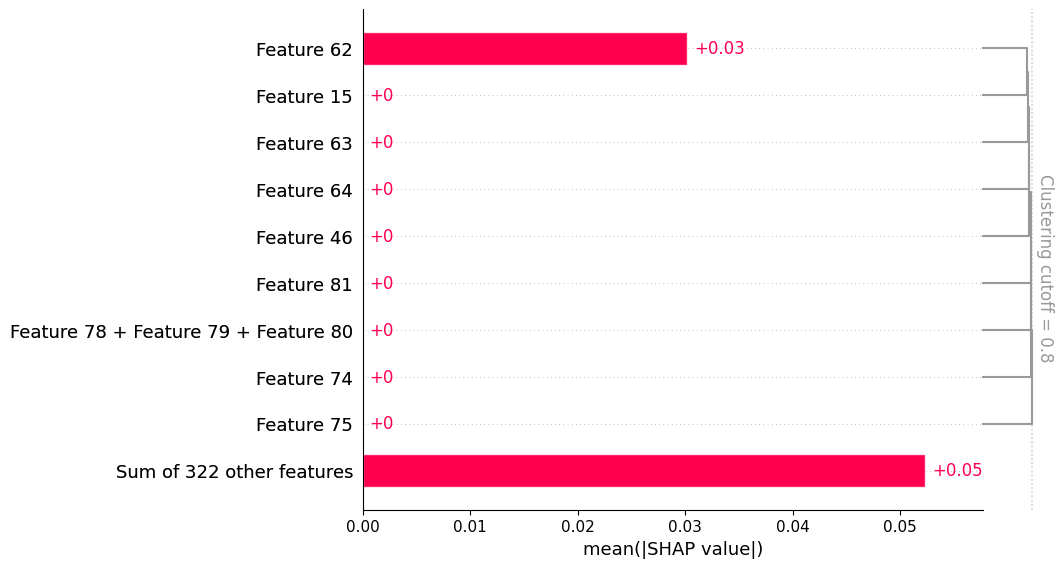

In [30]:
shap.plots.bar(explanation, clustering=clustering, clustering_cutoff=0.8, show=False)
plt.savefig('outputs/02_01_shap/shap_cluster_md_3.png')
plt.show()

### XGBoost

max_depth = 4

In [31]:
# train a model with single tree
Xd = xgboost.DMatrix(X, label=y) 
model = xgboost.train({"eta": 1, "max_depth": 4, "base_score": 0, "lambda": 0}, Xd, 1)
baseline_error = np.linalg.norm(y - model.predict(Xd))
print("Baseline Model error =", baseline_error)
print(model.get_dump(with_stats=True)[0])

Baseline Model error = 61.715334175555064
0:[Q13- Is the performance of your work taxing on you?-To work on screen_Most of the time<1] yes=1,no=2,missing=2,gain=27.6712646,cover=28758
	1:[Q2- How old are you?_18 - 30<1] yes=3,no=4,missing=4,gain=10.4526672,cover=11642
		3:[Q2- How old are you?_30 - 39<1] yes=7,no=8,missing=8,gain=10.1537247,cover=9410
			7:[Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-'work organization_Satisfying<1] yes=15,no=16,missing=16,gain=3.18555069,cover=6390
				15:leaf=0.115195148,cover=2639
				16:leaf=0.0698480383,cover=3751
			8:[Q42-During the last 12 months have you had a work accident?_Yes<1] yes=17,no=18,missing=18,gain=4.51096344,cover=3020
				17:leaf=0.150260866,cover=2875
				18:leaf=0.331034482,cover=145
		4:[Q42-During the last 12 months have you had a work accident?_Yes<1] yes=9,no=10,missing=10,gain=3.61497498,cover=2232
			9:[Q19- For each of the following points indicate 

In [32]:
# Calculate model accuracy and F1 score

y_pred = model.predict(Xd)
y_pred = [1 if i > 0.5 else 0 for i in y_pred] # convert to binary
print(f"F1 Score {f1_score(y, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y, y_pred)}")

F1 Score 0.45773683012164296
Accuracy 0.8369844912719939


In [33]:
pred = model.predict(Xd, output_margin=True)

explainer = shap.TreeExplainer(model)
explanation = explainer(Xd)

shap_values = explanation.values
# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - pred).max()

1.1920929e-07

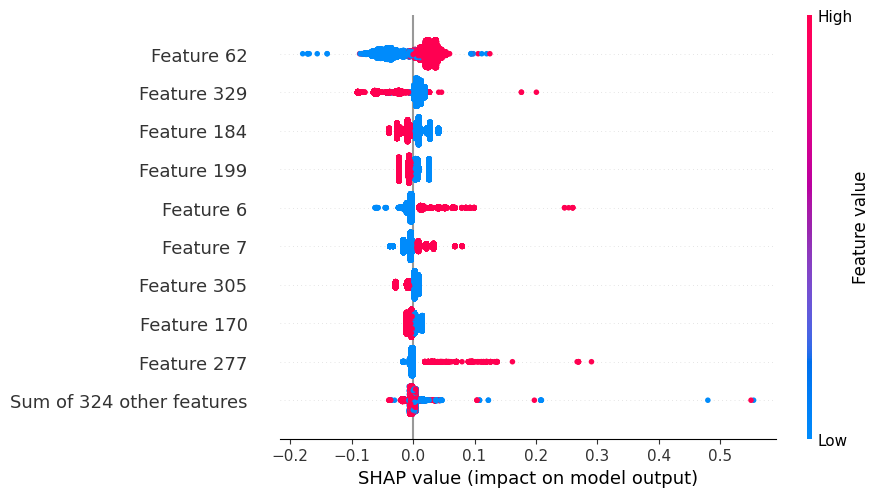

In [34]:
shap.plots.beeswarm(explanation, show=False) # plot the SHAP values
plt.figsize=(32,12)
plt.savefig('outputs/02_01_shap/shap_beeswarm_plot_xg_4.png')
plt.show()

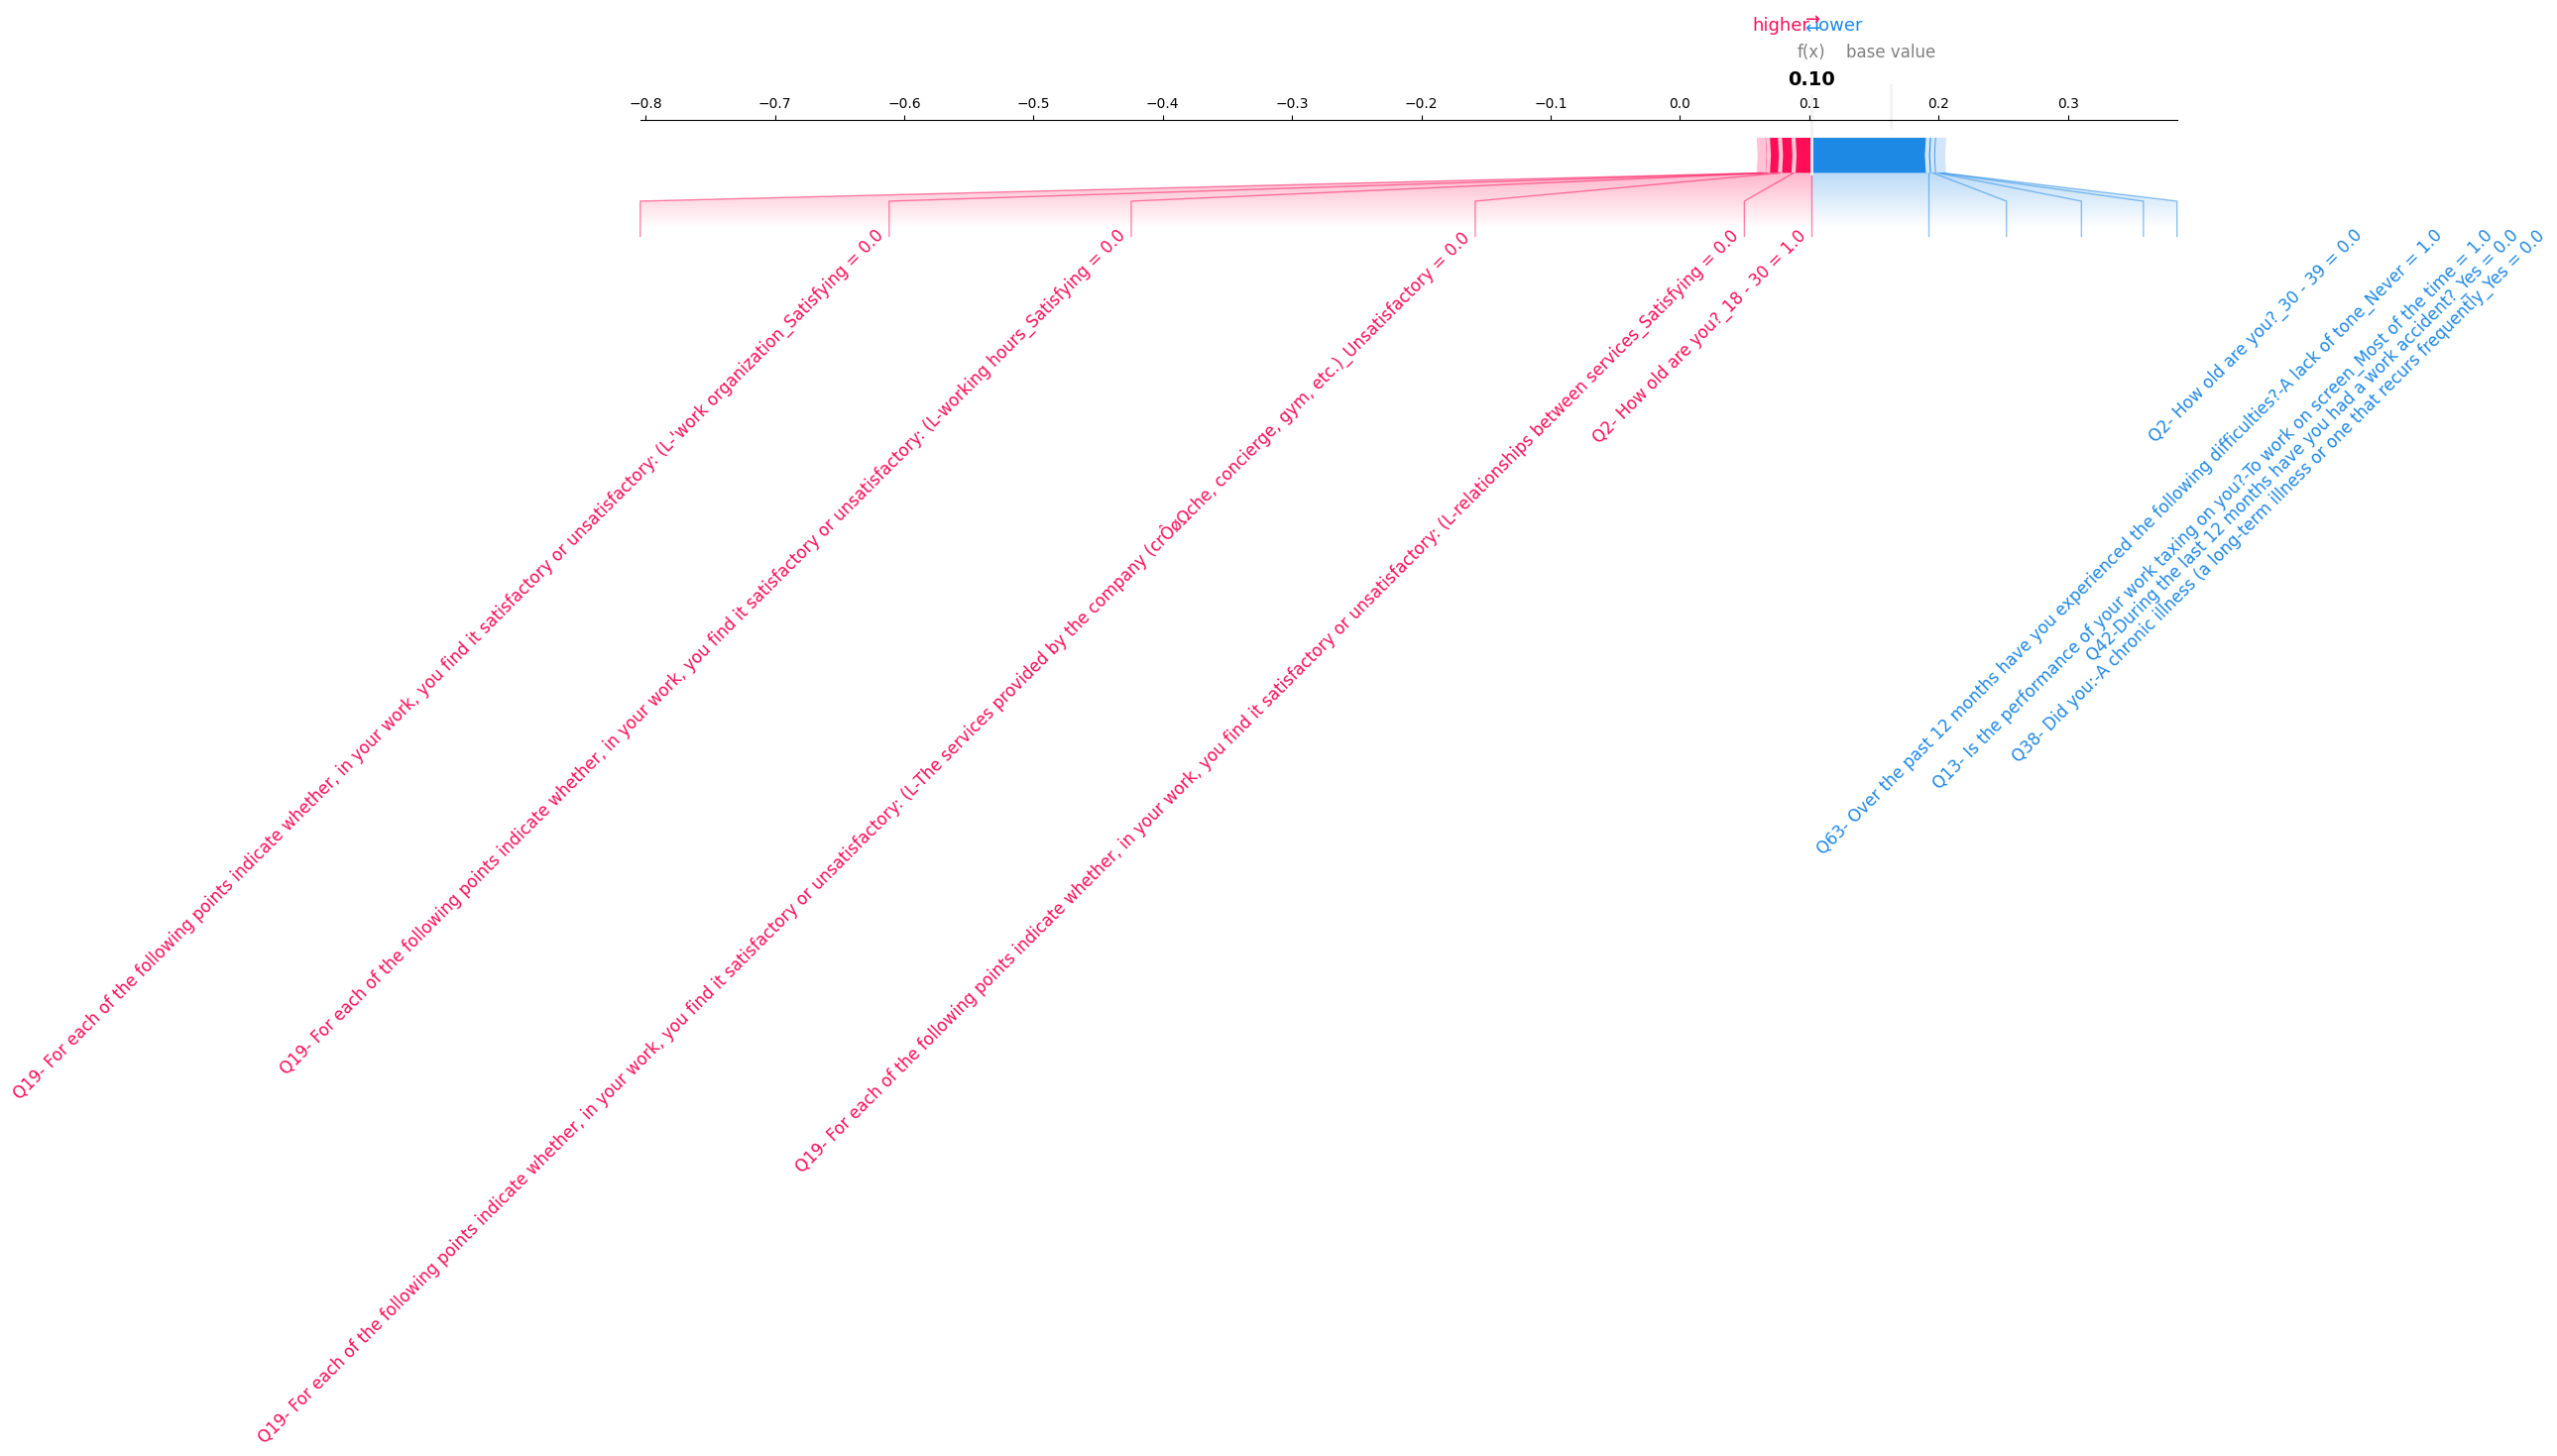

In [35]:
shap.force_plot(explanation.base_values[0], shap_values[0,:], X.iloc[0,:], text_rotation=45, matplotlib=True, show= False) # shows the shap values for the second prediction
plt.savefig('outputs/02_01_shap/shap_force_plot_xg_4.png')
plt.show()

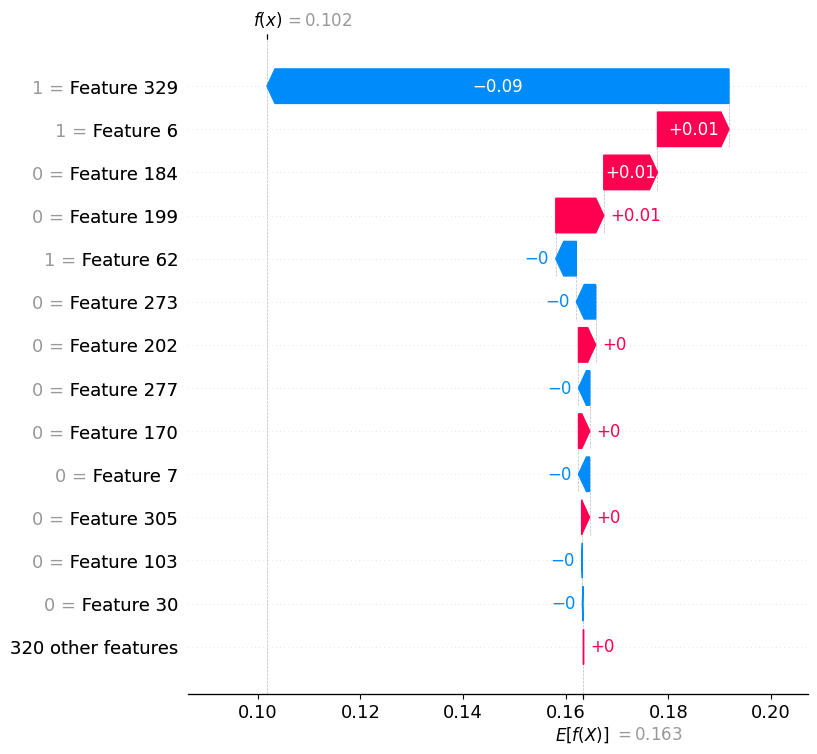

In [36]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(explanation[0,:], max_display=14, show=False)
plt.figsize=(32,18)
plt.savefig('outputs/02_01_shap/shap_waterfall_plot_xg_4.png')
plt.show()

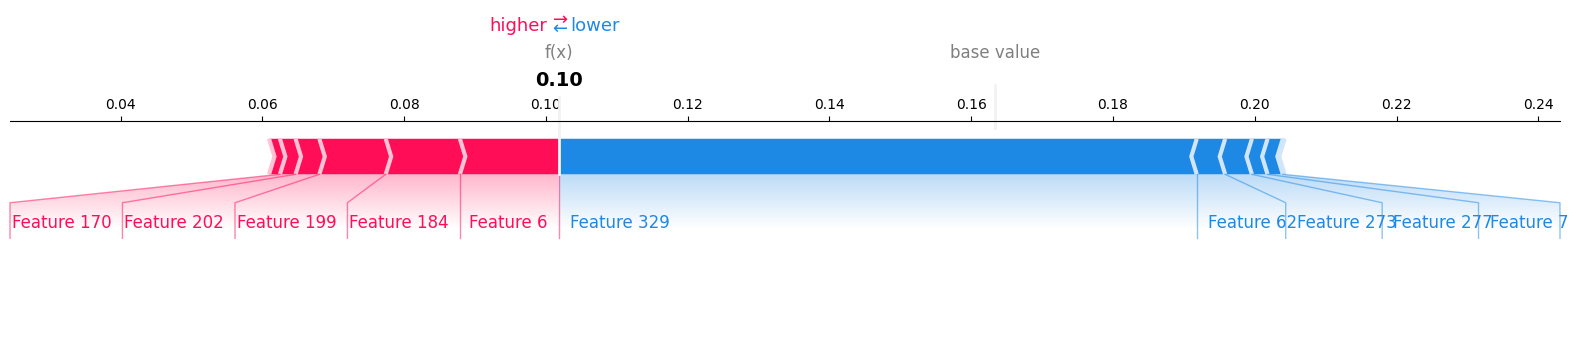

In [37]:
shap.plots.force(explainer.expected_value, shap_values[0, ...], show= False, matplotlib=True) # shap_values[0, ...] is the SHAP values for the first instance in the dataset ... is a numpy slice that means "all of the other axes"
plt.savefig('outputs/02_01_shap/shap_force_plot_xg_4_2.png')
plt.show()

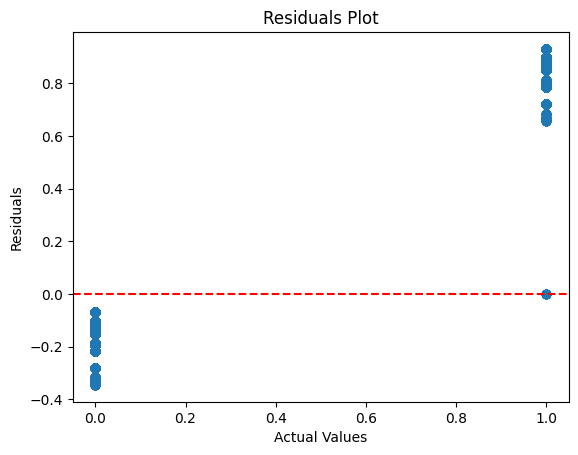

In [38]:
residuals = y - model.predict(Xd)
plt.scatter(y, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# save the plot
plt.savefig('outputs/02_01_shap/residuals_plot.png')
plt.show()

In [39]:
st = time.time()
clustering = shap.utils.hclust(X, y)
et = time.time()
print(time_e(st, et, "Clustering"))

334it [04:42,  1.16it/s]                         

Elapsed time to compute Clustering: 4 minutes and 47 seconds


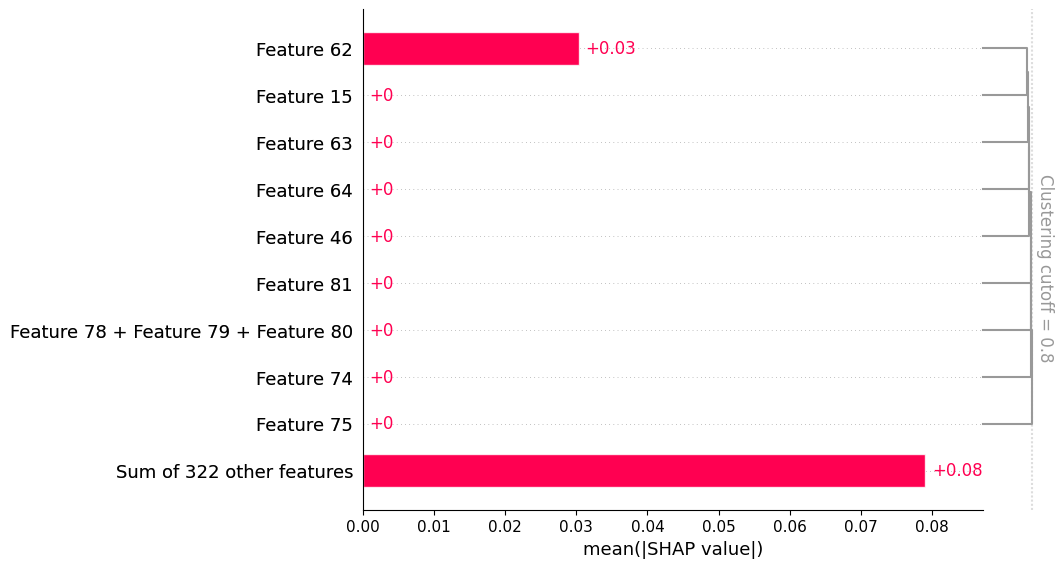

In [40]:
shap.plots.bar(explanation, clustering=clustering, clustering_cutoff=0.8, show=False)
plt.savefig('outputs/02_01_shap/shap_cluster_md_3.png')
plt.show()

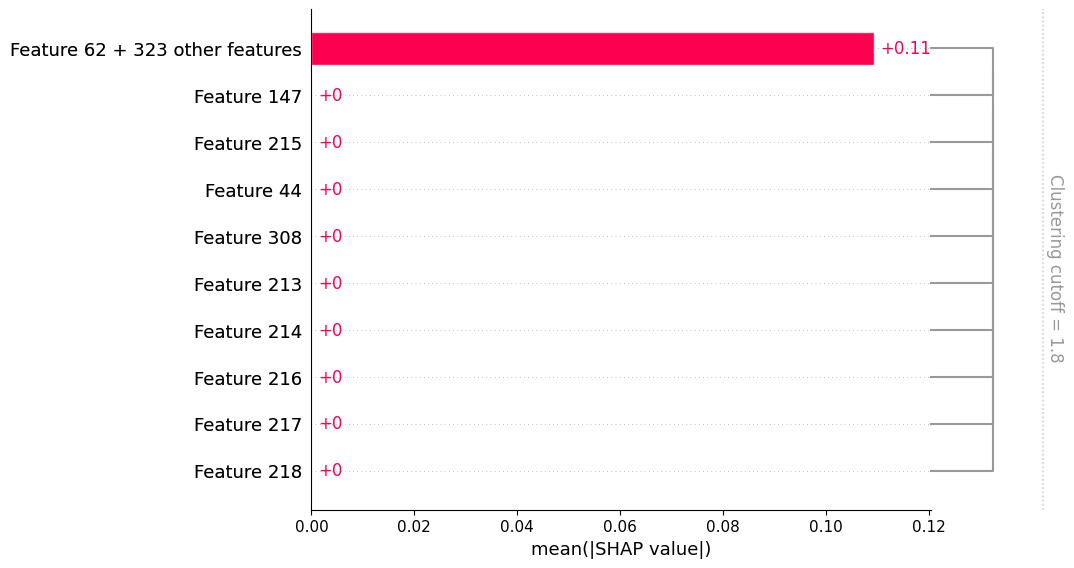

In [41]:
shap.plots.bar(explanation, clustering=clustering, clustering_cutoff=1.8, show=False)
plt.savefig('outputs/02_01_shap/shap_cluster_md_3_1_8.png')
plt.show()